#Data Preparation

In [ ]:
!pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
!pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [ ]:
df = pd.read_csv('new_customer_supermarket.csv', sep='\t', index_col=0)
df

BasketID           BasketDate  Sale  CustomerID ProdID  \
0         539993  2011-04-01 10:00:00  1.95     13313.0  22386   
1         539993  2011-04-01 10:00:00  0.42     13313.0  21499   
2         539993  2011-04-01 10:00:00  0.42     13313.0  21498   
3         539993  2011-04-01 10:00:00  2.10     13313.0  22379   
4         539993  2011-04-01 10:00:00  1.25     13313.0  20718   
...          ...                  ...   ...         ...    ...   
363571    581587  2011-09-12 12:50:00  0.85     12680.0  22613   
363572    581587  2011-09-12 12:50:00  2.10     12680.0  22899   
363573    581587  2011-09-12 12:50:00  4.15     12680.0  23254   
363574    581587  2011-09-12 12:50:00  4.15     12680.0  23255   
363575    581587  2011-09-12 12:50:00  4.95     12680.0  22138   

                              ProdDescr  Qta  TotSale  
0               JUMBO BAG PINK POLKADOT   10    19.50  
1                    BLUE POLKADOT WRAP   25    10.50  
2                    RED RETROSPOT WRAP   25    10.50  
3               RECYCLING BAG RETROSPOT    5    10.50  
4             RED RETROSPOT SHOPPER BAG   10    12.50  
...                                 ...  ...      ...  
363571         PACK OF SPACEBOY NAPKINS   12    10.20  
363572       CHILDRENS APRON DOLLY GIRL    6    12.60  
363573     CHILDRENS CUTLERY DOLLY GIRL    4    16.60  
363574  CHILDRENS CUTLERY CIRCUS PARADE    4    16.60  
363575       BAKING SET PIECE RETROSPOT    3    14.85  

[363576 rows x 8 columns]

In [ ]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
TotSale       float64
dtype: object

In [ ]:
df = df.astype({
    'BasketDate': 'datetime64[ns]',
    'BasketID': 'object',
    'CustomerID': 'object'
})


DATA CLEANING

In [ ]:

# Check for missing values
print(df.isnull().sum())

# Example Handling:
# Drop rows with critical missing values (e.g., BasketID, ProdDescr)
df = df.dropna(subset=['BasketID', 'ProdDescr'])

# Fill missing CustomerID with a placeholder (e.g., -1)
df['CustomerID'] = df['CustomerID'].fillna(-1)


BasketID      0
BasketDate    0
Sale          0
CustomerID    0
ProdID        0
ProdDescr     0
Qta           0
TotSale       0
dtype: int64


/tmp/ipykernel_508/2003472420.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CustomerID'] = df['CustomerID'].fillna(-1)


In [ ]:
# correct data types: # Convert BasketDate to datetime
df['BasketDate'] = pd.to_datetime(df['BasketDate'])

# Ensure numerical columns are numeric
df['Sale'] = pd.to_numeric(df['Sale'], errors='coerce')
df['Qta'] = pd.to_numeric(df['Qta'], errors='coerce')
df['TotSale'] = pd.to_numeric(df['TotSale'], errors='coerce')


In [ ]:
# Display data types and a sample to verify
print("\nData Types After Correction:")
print(df.dtypes)

print("\nSample Data After Correcting Data Types:")
print(df.head())



Data Types After Correction:
BasketID              object
BasketDate    datetime64[ns]
Sale                 float64
CustomerID           float64
ProdID                object
ProdDescr             object
Qta                    int64
TotSale              float64
dtype: object

Sample Data After Correcting Data Types:
  BasketID          BasketDate  Sale  CustomerID ProdID  \
0   539993 2011-04-01 10:00:00  1.95     13313.0  22386   
1   539993 2011-04-01 10:00:00  0.42     13313.0  21499   
2   539993 2011-04-01 10:00:00  0.42     13313.0  21498   
3   539993 2011-04-01 10:00:00  2.10     13313.0  22379   
4   539993 2011-04-01 10:00:00  1.25     13313.0  20718   

                   ProdDescr  Qta  TotSale  
0    JUMBO BAG PINK POLKADOT   10     19.5  
1         BLUE POLKADOT WRAP   25     10.5  
2         RED RETROSPOT WRAP   25     10.5  
3    RECYCLING BAG RETROSPOT    5     10.5  
4  RED RETROSPOT SHOPPER BAG   10     12.5  


In [ ]:
# Adressing outliers
# Calculate IQR for Sale
Q1 = df['Sale'].quantile(0.25)
Q3 = df['Sale'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with extreme outliers
df = df[~((df['Sale'] < (Q1 - 1.5 * IQR)) | (df['Sale'] > (Q3 + 1.5 * IQR)))]


In [ ]:
# Display summary statistics for numeric columns
print("\nSummary Statistics of Cleaned Data:")
print(df.describe())

# Display the first few rows of cleaned data
print("\nSample of Cleaned Data:")
print(df.head())



Summary Statistics of Cleaned Data:
                          BasketDate           Sale     CustomerID  \
count                         333483  333483.000000  333483.000000   
mean   2011-07-13 22:40:19.088889088       2.124719   15286.902307   
min              2011-01-02 08:23:00       0.040000   12347.000000   
25%              2011-04-17 12:57:00       0.850000   13953.000000   
50%              2011-07-20 12:58:00       1.650000   15150.000000   
75%              2011-10-14 10:25:00       2.950000   16779.000000   
max              2011-12-10 17:19:00       7.500000   18287.000000   
std                              NaN       1.535495    1709.123615   

                 Qta        TotSale  
count  333483.000000  333483.000000  
mean       13.556706      20.438239  
min         1.000000       0.060000  
25%         2.000000       4.200000  
50%         6.000000      10.500000  
75%        12.000000      18.150000  
max      4800.000000    7144.720000  
std        44.047758      68

## DATA PREPROCESSING

Feature Extraction

The total number of items purchased by a customer during the period of observation:

In [ ]:
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.columns = ['CustomerID', 'I']
I

CustomerID     I
0        12347.0  2108
1        12348.0  1084
2        12349.0   595
3        12350.0   196
4        12352.0   437
...          ...   ...
4174     18280.0    40
4175     18281.0    52
4176     18282.0    94
4177     18283.0  1351
4178     18287.0  1582

[4179 rows x 2 columns]

The number of distinct items bought by a customer in the period of observation:

In [ ]:
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.columns = ['CustomerID', 'Iu']
Iu

CustomerID   Iu
0        12347.0   84
1        12348.0    9
2        12349.0   60
3        12350.0   16
4        12352.0   49
...          ...  ...
4174     18280.0    8
4175     18281.0    5
4176     18282.0    9
4177     18283.0  258
4178     18287.0   58

[4179 rows x 2 columns]

The maximum number of items purchased by a customer during a shopping session:

In [ ]:
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum()[['CustomerID', 'Qta']].groupby('CustomerID', as_index=False)['Qta'].max()
Imax.columns = ['CustomerID', 'Imax']
Imax

CustomerID  Imax
0        12347.0   668
1        12348.0   600
2        12349.0   595
3        12350.0   196
4        12352.0   119
...          ...   ...
4174     18280.0    40
4175     18281.0    52
4176     18282.0    68
4177     18283.0   241
4178     18287.0   990

[4179 rows x 2 columns]

The Shannon entropy on the purchasing behaviour of the customer:

In [ ]:
pd.DataFrame(df.groupby('CustomerID')['TotSale'].apply(lambda x : x.round().value_counts()))

TotSale
CustomerID              
12347.0    13.0       20
           17.0       17
           20.0       15
           15.0       13
           8.0        10
...                  ...
18287.0    87.0        1
           13.0        1
           40.0        1
           52.0        1
           45.0        1

[63545 rows x 1 columns]

In [ ]:
E = df.groupby('CustomerID')['TotSale'].apply(lambda x : entropy(x.round().value_counts(), base=2)).reset_index()
E.columns = ['CustomerID', 'E']
E

CustomerID         E
0        12347.0  4.133440
1        12348.0  2.550341
2        12349.0  3.571672
3        12350.0  2.500000
4        12352.0  2.914318
...          ...       ...
4174     18280.0  1.405639
4175     18281.0  1.370951
4176     18282.0  2.947703
4177     18283.0  2.603430
4178     18287.0  4.149473

[4179 rows x 2 columns]

The average price spent by a customer during a shopping session:

In [ ]:
Savg = df.groupby(['CustomerID', 'BasketID'], as_index=False)['TotSale'].sum()[['CustomerID', 'TotSale']].groupby('CustomerID', as_index=False)['TotSale'].mean()
Savg.columns = ['CustomerID', 'Savg']
Savg

CustomerID         Savg
0        12347.0   544.893333
1        12348.0   261.480000
2        12349.0  1089.150000
3        12350.0   294.400000
4        12352.0   168.435000
...          ...          ...
4174     18280.0   137.000000
4175     18281.0    46.920000
4176     18282.0    62.800000
4177     18283.0   124.792500
4178     18287.0   601.093333

[4179 rows x 2 columns]

In [ ]:
features = I.merge(Iu, on='CustomerID').merge(Imax, on='CustomerID').merge(E, on='CustomerID').merge(Savg, on='CustomerID').set_index('CustomerID')
features

I   Iu  Imax         E         Savg
CustomerID                                        
12347.0     2108   84   668  4.133440   544.893333
12348.0     1084    9   600  2.550341   261.480000
12349.0      595   60   595  3.571672  1089.150000
12350.0      196   16   196  2.500000   294.400000
12352.0      437   49   119  2.914318   168.435000
...          ...  ...   ...       ...          ...
18280.0       40    8    40  1.405639   137.000000
18281.0       52    5    52  1.370951    46.920000
18282.0       94    9    68  2.947703    62.800000
18283.0     1351  258   241  2.603430   124.792500
18287.0     1582   58   990  4.149473   601.093333

[4179 rows x 5 columns]

In [ ]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 25.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:

#Encode Categorical Data to numerical

from sklearn.preprocessing import LabelEncoder

# Label encode product descriptions (ProdDescr)
le = LabelEncoder()
df['ProdDescrEncoded'] = le.fit_transform(df['ProdDescr'])

# Show a sample of the encoding results
print("\nSample of encoded product descriptions:")
print(df[['ProdDescr', 'ProdDescrEncoded']].head())



Sample of encoded product descriptions:
                   ProdDescr  ProdDescrEncoded
0    JUMBO BAG PINK POLKADOT              1490
1         BLUE POLKADOT WRAP               318
2         RED RETROSPOT WRAP              2392
3    RECYCLING BAG RETROSPOT              2325
4  RED RETROSPOT SHOPPER BAG              2381


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize Sale, Qta, and TotSale
scaler = MinMaxScaler()
df[['Sale', 'Qta', 'TotSale']] = scaler.fit_transform(df[['Sale', 'Qta', 'TotSale']])

# Print the first few rows of the normalized data
print("\nSample of normalized numeric columns:")
print(df[['Sale', 'Qta', 'TotSale']].head())



Sample of normalized numeric columns:
       Sale       Qta   TotSale
0  0.256032  0.001875  0.002721
1  0.050938  0.005001  0.001461
2  0.050938  0.005001  0.001461
3  0.276139  0.000834  0.001461
4  0.162198  0.001875  0.001741


DATA TRANSFORMATION

In [ ]:
#3.1 Aggregate Data for Analysis

# Aggregate sales per customer
customer_data = df.groupby('CustomerID').agg({
    'Sale': 'sum',
    'Qta': 'sum',
    'TotSale': 'sum',
    'BasketID': 'nunique'
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={'BasketID': 'UniqueBaskets'}, inplace=True)

# Print the aggregated customer data
print("\nAggregated customer data:")
print(customer_data.head())





Aggregated customer data:
   CustomerID       Sale       Qta   TotSale  UniqueBaskets
0     12347.0  41.127346  0.409252  0.456386              6
1     12348.0   1.162198  0.223588  0.109702              3
2     12349.0  20.288204  0.111482  0.151939              1
3     12350.0   3.305630  0.037508  0.041071              1
4     12352.0  25.095174  0.078766  0.140954              6


In [ ]:
# Frequency: Number of baskets per customer
df['BasketCount'] = df.groupby('CustomerID')['BasketID'].transform('nunique')

# Recency: Time since last purchase
df['Recency'] = (df['BasketDate'].max() - df.groupby('CustomerID')['BasketDate'].transform('max')).dt.days

# Print a sample of recency and frequency data
print("\nSample of customer recency and frequency data:")
print(df[['CustomerID', 'BasketCount', 'Recency']].drop_duplicates().head())



Sample of customer recency and frequency data:
    CustomerID  BasketCount  Recency
0      13313.0            5       23
17     18097.0            5      206
27     16656.0           14        3
29     16875.0            5      145
51     13094.0           11       22


In [ ]:
#Time-based Transformations
# Day of week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['BasketDate'].dt.dayofweek


In [ ]:
## Hour of the transaction
df['HourOfDay'] = df['BasketDate'].dt.hour


##Feature Engineering -RFM ANALYSIS

In [ ]:
#RFM Analysis (Recency, Frequency, Monetary) is a data-driven method used to analyze and segment customers based on their purchasing behavior. It is widely applied in marketing and customer relationship management to identify valuable customers,
# improve customer retention, and create targeted marketing strategies.
rfm = df.groupby('CustomerID').agg({'BasketDate': lambda date: (df['BasketDate'].max() - date.max()).days,
                                    'BasketID': lambda basket: basket.nunique(),
                                    'TotSale': lambda sale: sale.sum()})
rfm.columns = ['R', 'F', 'M']
rfm

R   F         M
CustomerID                   
12347.0      40   6  0.456386
12348.0      76   3  0.109702
12349.0      19   1  0.151939
12350.0     311   1  0.041071
12352.0      73   6  0.140954
...         ...  ..       ...
18280.0     160   1  0.019108
18281.0       4   1  0.006525
18282.0     216   2  0.017504
18283.0      10  16  0.273460
18287.0       0   3  0.251816

[4179 rows x 3 columns]

In [ ]:
one_time_buyers = round(sum(rfm['F'] == 1) / len(rfm) * 100, 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 36.28 %


In [ ]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

R    F         M
0.25   22.0  1.0  0.033986
0.50   58.0  2.0  0.076976
0.75  151.0  4.0  0.190537

In [ ]:
# Arguments (x=value, p=recency, d=quartiles)
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Arguments (x=value, p=frequency, monetary, d=quartiles)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
# create RFM segmentation table
rfm['R_quartile'] = rfm['R'].apply(RScore, args=('R', quantiles))
rfm['F_quartile'] = rfm['F'].apply(FMScore, args=('F', quantiles))
rfm['M_quartile'] = rfm['M'].apply(FMScore, args=('M', quantiles))
rfm

R   F         M  R_quartile  F_quartile  M_quartile
CustomerID                                                       
12347.0      40   6  0.456386           2           1           1
12348.0      76   3  0.109702           3           2           2
12349.0      19   1  0.151939           1           4           2
12350.0     311   1  0.041071           4           4           3
12352.0      73   6  0.140954           3           1           2
...         ...  ..       ...         ...         ...         ...
18280.0     160   1  0.019108           4           4           4
18281.0       4   1  0.006525           1           4           4
18282.0     216   2  0.017504           4           3           4
18283.0      10  16  0.273460           1           1           1
18287.0       0   3  0.251816           1           2           1

[4179 rows x 6 columns]

In [ ]:
rfm['RFM'] = rfm.R_quartile.map(str) + rfm.F_quartile.map(str) + rfm.M_quartile.map(str)
rfm

R   F         M  R_quartile  F_quartile  M_quartile  RFM
CustomerID                                                            
12347.0      40   6  0.456386           2           1           1  211
12348.0      76   3  0.109702           3           2           2  322
12349.0      19   1  0.151939           1           4           2  142
12350.0     311   1  0.041071           4           4           3  443
12352.0      73   6  0.140954           3           1           2  312
...         ...  ..       ...         ...         ...         ...  ...
18280.0     160   1  0.019108           4           4           4  444
18281.0       4   1  0.006525           1           4           4  144
18282.0     216   2  0.017504           4           3           4  434
18283.0      10  16  0.273460           1           1           1  111
18287.0       0   3  0.251816           1           2           1  121

[4179 rows x 7 columns]

In [ ]:
rfm[rfm['RFM'] == '111'].sort_values('M', ascending=False)


R    F          M  R_quartile  F_quartile  M_quartile  RFM
CustomerID                                                             
14646.0      2   71  35.590587           1           1           1  111
18102.0     12   53  27.846149           1           1           1  111
17450.0      3   41  24.904355           1           1           1  111
14911.0      0  182  14.429568           1           1           1  111
14156.0      0   51  13.318544           1           1           1  111
...         ..  ...        ...         ...         ...         ...  ...
15351.0     13    6   0.193991           1           1           1  111
15134.0     15    8   0.193657           1           1           1  111
14434.0     22    6   0.192043           1           1           1  111
14834.0      0    6   0.191610           1           1           1  111
17870.0     15   11   0.191486           1           1           1  111

[434 rows x 7 columns]

In [ ]:
print('Best Customers:', len(rfm[rfm['RFM'] == '111']))
print('Loyal Customers:', len(rfm[rfm['F_quartile'] == 1]))
print('Big Spenders:', len(rfm[rfm['M_quartile'] == 1]))
print('Almost Lost:', len(rfm[rfm['RFM'] == '311']))
print('Lost Customers:', len(rfm[rfm['RFM'] == '411']))
print('Lost Cheap Customers:', len(rfm[rfm['RFM'] == '444']))

Best Customers: 434
Loyal Customers: 1002
Big Spenders: 1045
Almost Lost: 99
Lost Customers: 11
Lost Cheap Customers: 434


In [ ]:
from scipy.stats import entropy
import pandas as pd

# Load the dataset
df = pd.read_csv('new_customer_supermarket.csv', sep='\t', index_col=0)

# Compute features for customer_profile
# 1. Total Quantity per Customer (I)
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.columns = ['CustomerID', 'I']

# 2. Number of Unique Products per Customer (Iu)
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.columns = ['CustomerID', 'Iu']

# 3. Maximum Quantity in a Single Basket per Customer (Imax)
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum() \
         .groupby('CustomerID', as_index=False)['Qta'].max()
Imax.columns = ['CustomerID', 'Imax']

# 4. Entropy of Spending Behavior (E)
E = df.groupby('CustomerID')['TotSale'].apply(
    lambda x: entropy(x.round().value_counts(), base=2)).reset_index()
E.columns = ['CustomerID', 'E']

# 5. Average Total Sale per Basket (Savg)
Savg = df.groupby(['CustomerID', 'BasketID'], as_index=False)['TotSale'].sum() \
         .groupby('CustomerID', as_index=False)['TotSale'].mean()
Savg.columns = ['CustomerID', 'Savg']

# Combine features into customer_profile
customer_profile = I.merge(Iu, on='CustomerID') \
                    .merge(Imax, on='CustomerID') \
                    .merge(E, on='CustomerID') \
                    .merge(Savg, on='CustomerID')

# Compute RFM
rfm = df.groupby('CustomerID').agg({
    'BasketDate': lambda x: (pd.to_datetime(df['BasketDate'].max()) - pd.to_datetime(x).max()).days,
    'BasketID': 'nunique',
    'TotSale': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'R', 'F', 'M']

# Merge RFM into customer_profile
customer_profile = customer_profile.merge(rfm, on='CustomerID', how='left')

# Set CustomerID as the index
customer_profile = customer_profile.set_index('CustomerID')

# Save the combined profile to CSV
customer_profile.to_csv('customer_profile_with_rfm.csv')

# Display the combined customer profile
print("\nCustomer Profile with RFM:")
print(customer_profile.head())

#I =(Total Items Purchased)
#Iu (Distinct Items Purchased):
#Imax (Maximum Items in a Single Purchase):
# E=avg



Customer Profile with RFM:
               I  Iu  Imax         E         Savg    R  F        M
CustomerID                                                        
12347.0     2139  87   676  4.239118   599.701667   40  6  3598.21
12348.0     1084   9   600  2.550341   261.480000   76  3   784.44
12349.0      630  72   630  3.903268  1457.550000   19  1  1457.55
12350.0      196  16   196  2.500000   294.400000  311  1   294.40
12352.0      463  57   125  3.158366   210.901667   73  6  1265.41


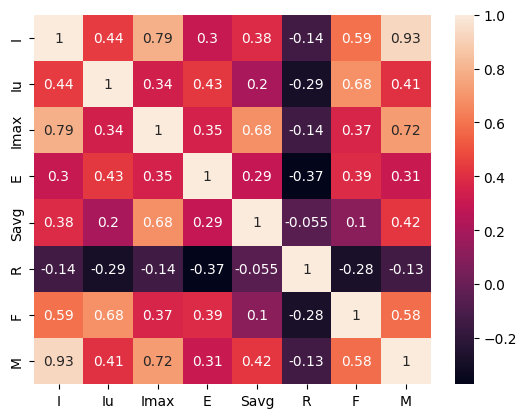

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the directory exists
save_dir = '../tex/img/preparation/'
os.makedirs(save_dir, exist_ok=True)

# Create heatmap
sns.heatmap(customer_profile.corr(), annot=True)

# Save the plot
plt.savefig(os.path.join(save_dir, 'features_corr.png'))

#Strong Correlations:

#I (Total Items Purchased) and M (Monetary Value): Correlation = 0.93


#I and Imax (Maximum Items in a Single Session) Correlation = 0.79

# Imax and M

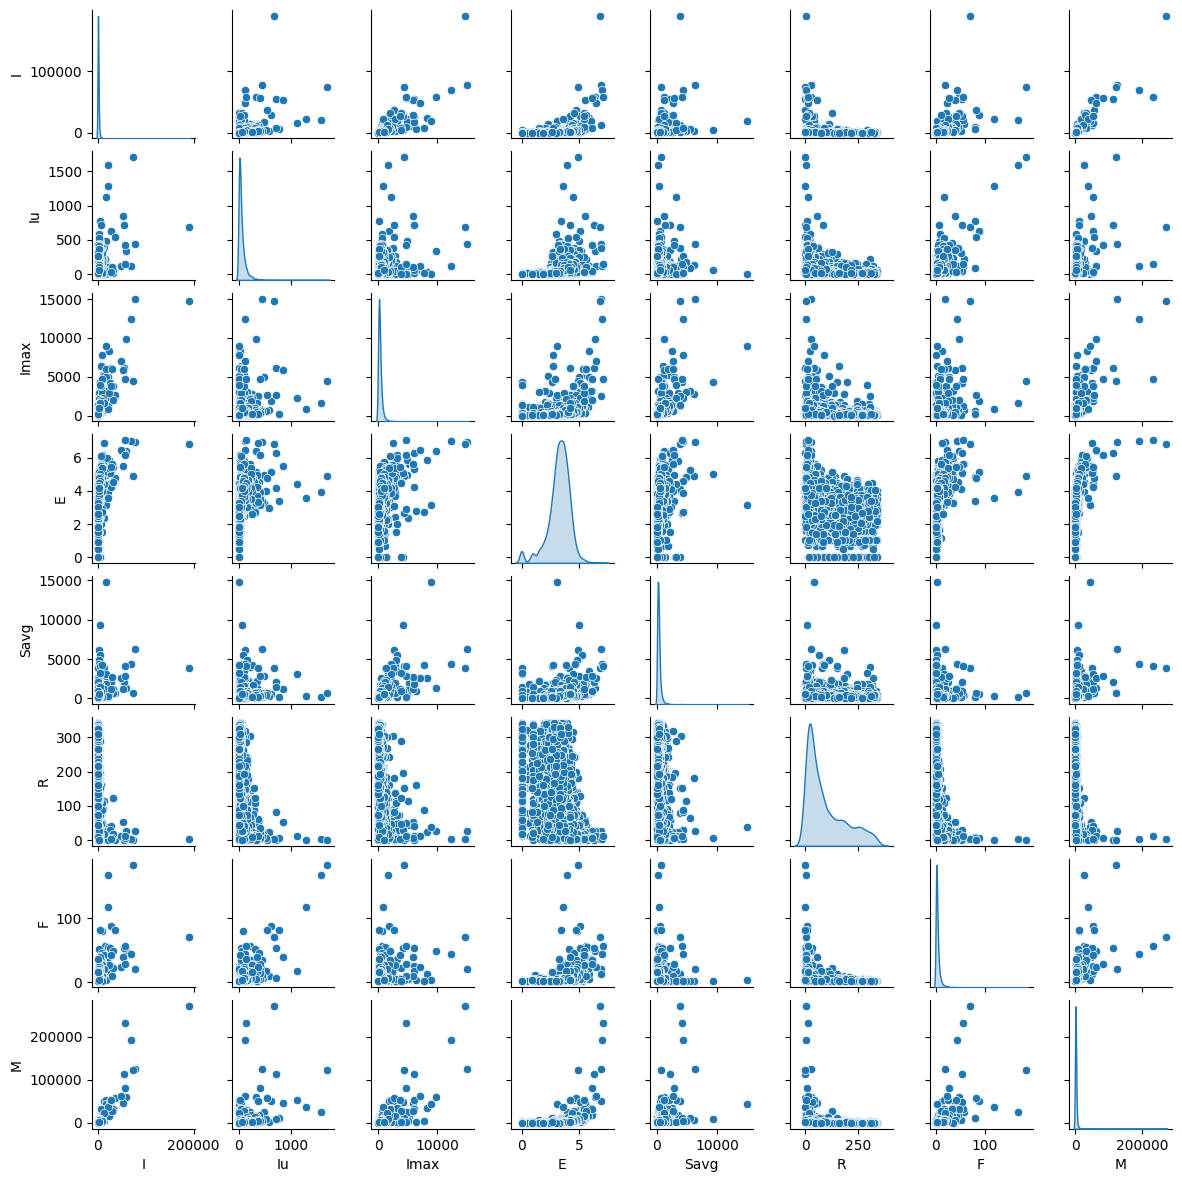

In [ ]:
# produce a scatter matrix for each pair of features in the data
sns.pairplot(customer_profile, diag_kind='kde', height=1.5);

plt.savefig('../tex/img/preparation/features_pairplot.png')

We can notice that we have a skewed distribution of the variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [ ]:
log_customer_profile = pd.DataFrame({'I': np.log10(customer_profile['I']),
                                     'Iu': np.log10(customer_profile['Iu']),
                                     'Imax': np.log10(customer_profile ['Imax']),
                                     'E': customer_profile['E'],
                                     'Savg': np.log10(customer_profile['Savg']),
                                     'R': customer_profile['R'],
                                     'F': np.log10(customer_profile['F']),
                                     'M': np.log10(customer_profile['M'])})
log_customer_profile

I        Iu      Imax         E      Savg    R         F  \
CustomerID                                                                    
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935   40  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438   76  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623   19  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  311  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080   73  0.778151   
...              ...       ...       ...       ...       ...  ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  160  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519    4  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  216  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421   10  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054    0  0.477121   

                   M  
CustomerID            
12347.0     3.556087  
12348.0     2.894560  
12349.0     3.163623  
12350.0     2.468938  
12352.0     3.102231  
...              ...  
18280.0     2.256718  
18281.0     1.907519  
18282.0     2.246991  
18283.0     3.309541  
18287.0     3.264175  

[4205 rows x 8 columns]

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

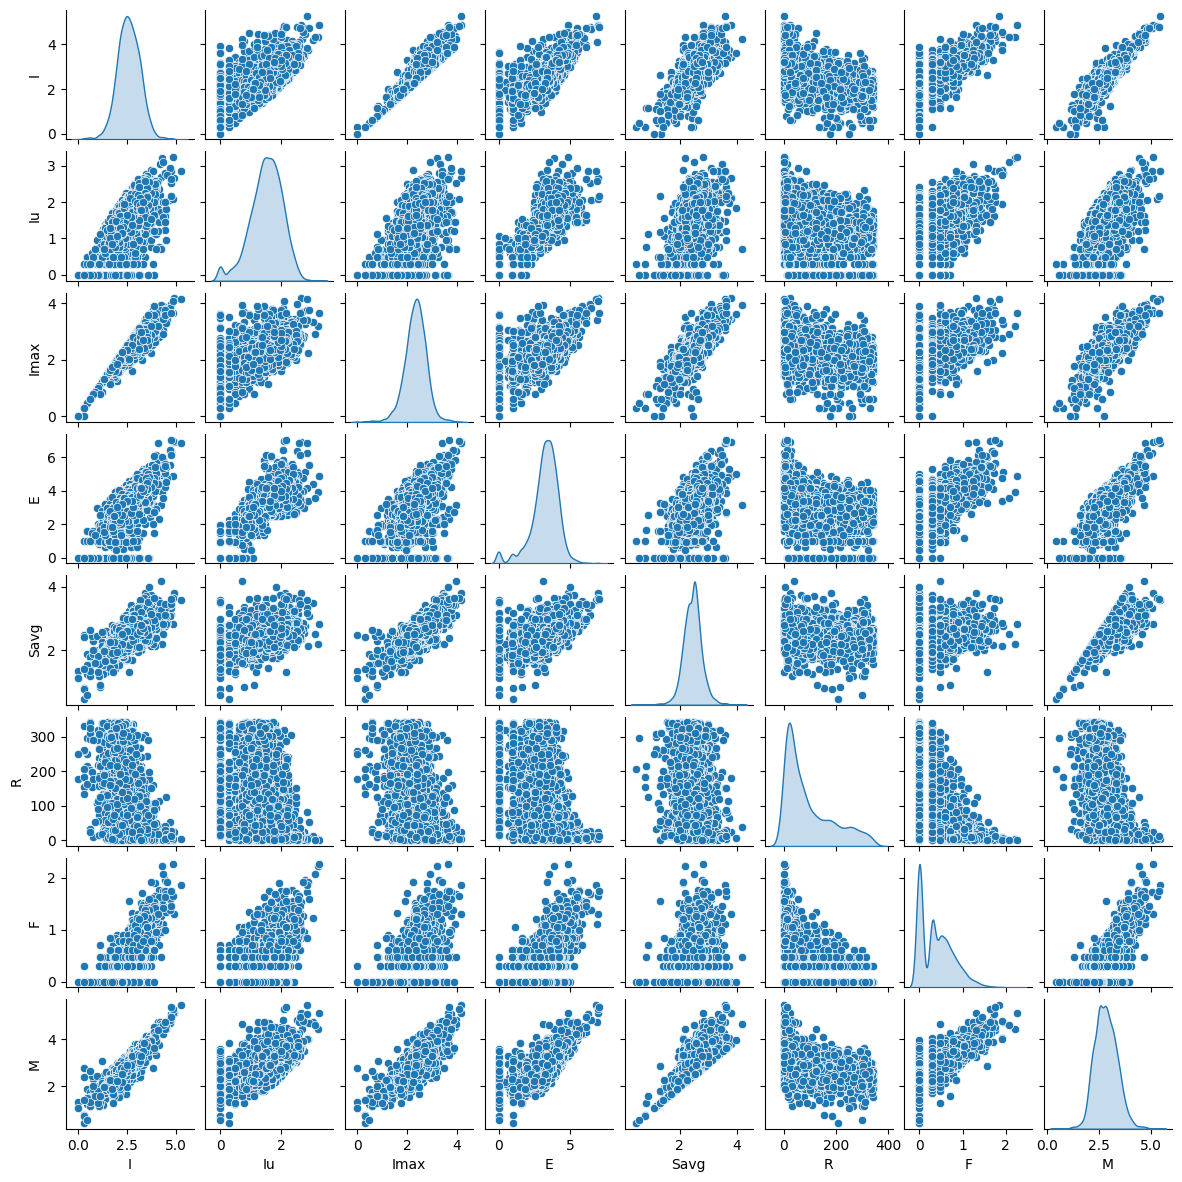

In [ ]:
# produce a scatter matrix for each pair of features in the data
sns.pairplot(log_customer_profile, palette='Dark2', diag_kind='kde', height=1.5);

plt.savefig('../tex/img/preparation/features_pairplot_logs.png')

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

ModuleNotFoundError: No module named 'nltk'

## Saving the Customer Profile model

In [ ]:
log_customer_profile.to_csv('customer_profile_model.csv', sep='\t')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
customer_profile = pd.read_csv('customer_profile_model.csv', sep='\t', index_col=0)
customer_profile

I        Iu      Imax         E      Savg    R         F  \
CustomerID                                                                    
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935   40  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438   76  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623   19  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  311  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080   73  0.778151   
...              ...       ...       ...       ...       ...  ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  160  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519    4  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  216  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421   10  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054    0  0.477121   

                   M  
CustomerID            
12347.0     3.556087  
12348.0     2.894560  
12349.0     3.163623  
12350.0     2.468938  
12352.0     3.102231  
...              ...  
18280.0     2.256718  
18281.0     1.907519  
18282.0     2.246991  
18283.0     3.309541  
18287.0     3.264175  

[4205 rows x 8 columns]

In [ ]:
customer_profile.drop('R', axis=1, inplace=True)


# Standardization & Dimensionality Reduction


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

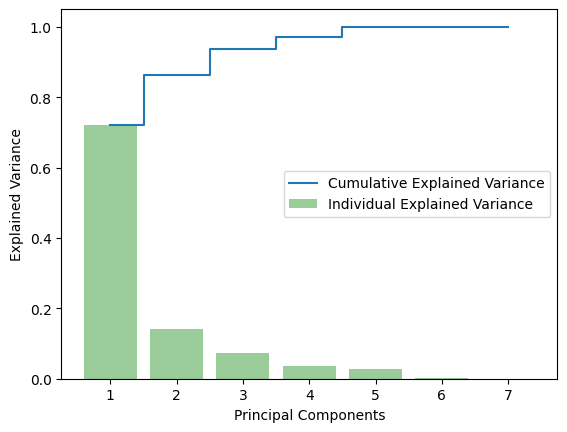

In [ ]:
scaler = StandardScaler()
std_customer_profile = scaler.fit_transform(customer_profile)

pca = PCA()
pca.fit(std_customer_profile)

plt.step(range(1, customer_profile.shape[1] + 1), pca.explained_variance_ratio_.cumsum(),
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, customer_profile.shape[1] + 1), pca.explained_variance_ratio_,
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');



The graph shows the amount of variance captured depending on the number of components we include. A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 2 components.




In [ ]:
pca = PCA(n_components=2)
pca_customer_profile = pca.fit_transform(std_customer_profile)

#Clustering

In [ ]:
#Choosing the Number of Clusters - Elbow Method:, The Elbow Method is used to find the optimal number of clusters (K) for K-Means.
#The Silhouette Score measures how similar each point is to its own cluster compared to other clusters.
A score close to 1 indicates that the data point is well clustered, while a score close to -1 indicates that the point is poorly clustered

The Elbow Method is used to find the optimal number of clusters (K) for K-Means.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [ ]:
def plot_silhouette_score(df, labels):
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(df, labels)

    y_ax_lower, y_ax_upper = 0, 0
    y_tick = []

    for i, c in enumerate(cluster_labels):

        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()

        print('Cluster', c, 'avg silhouette:', np.mean(c_silhouette_vals))

        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        y_tick.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    print('Total avg silhouette:', silhouette_avg)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks=(y_tick, cluster_labels + 1)
    plt.ylabel('Points')
    plt.xlabel('Silhouette')
    plt.tight_layout()

In [ ]:
def plot_similarity_heatmap(df, labels):
    df = pd.DataFrame(df)
    df['cluster'] = labels
    columns = df.columns[0:-1]
    df.sort_values(by='cluster', ascending=False, inplace=True)
    dist = euclidean_distances(df.loc[:, columns], df.loc[:, columns])
    sim = np.exp(-dist)
    fig, ax = plt.subplots(figsize=(7,5))
    sns.heatmap(sim, ax=ax)

In [ ]:
def plot_basic_statistics(df, labels, columns):
    df = pd.DataFrame(df, columns=columns)
    df['cluster'] = labels
    columns = df.columns[0:-1]
    means = []
    std = []
    for i in np.unique(df['cluster'].array):
        clust = df.loc[df['cluster'] == i, columns]
        means.append(clust.describe().loc['mean'].values)
        std.append(clust.describe().loc['std'].values)
    legend = []
    for i in np.unique(df['cluster'].array):
        plt.plot(range(0, columns.shape[0]), means[i], marker='o')
        legend.append('Cluster %d' %i)
    plt.legend(legend)
    plt.xticks(range(0, columns.shape[0]), columns)

In [ ]:
elbow = dict()
silhouette = dict()
for k in range(2, 15):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    clusters = kmeans.fit_predict(pca_customer_profile)
    elbow[k] = kmeans.inertia_
    silhouette[k] = silhouette_score(pca_customer_profile, clusters)

Silhouette method


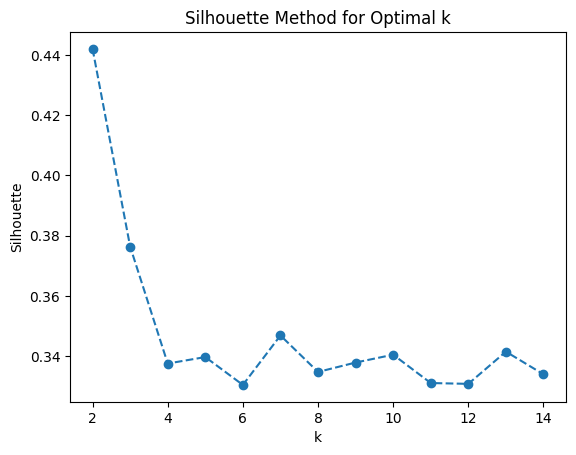

In [ ]:
plt.plot(*zip(*silhouette.items()), marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.ylabel('Silhouette')
plt.xlabel('k');



In [ ]:
print('The best (k, silhouette score) is:', max(silhouette.items(), key=lambda t: t[1]))


The best (k, silhouette score) is: (2, 0.44199897010543987)


Cluster 0 avg silhouette: 0.42446656713121217
Cluster 1 avg silhouette: 0.46123651950359495
Total avg silhouette: 0.44199897010543987


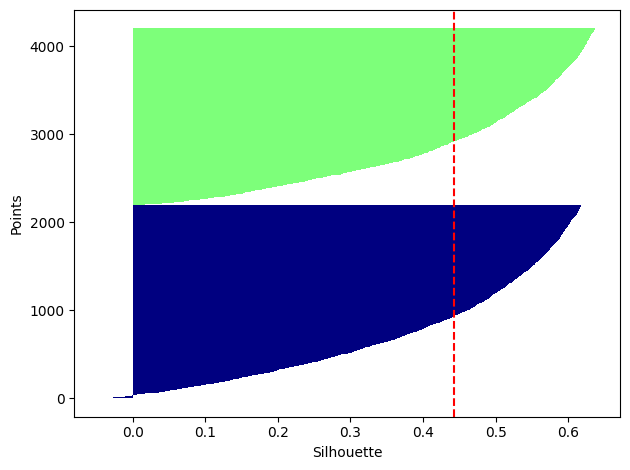

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2)
clusters_customers = kmeans.fit_predict(pca_customer_profile)
plot_silhouette_score(pca_customer_profile, clusters_customers)


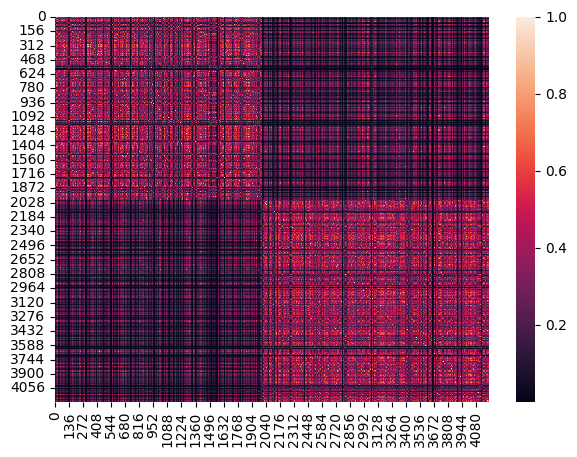

In [ ]:
plot_similarity_heatmap(customer_profile, clusters_customers)


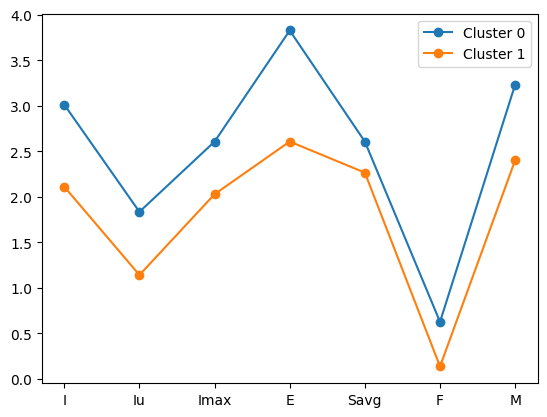

In [ ]:
plot_basic_statistics(customer_profile, clusters_customers, customer_profile.columns)


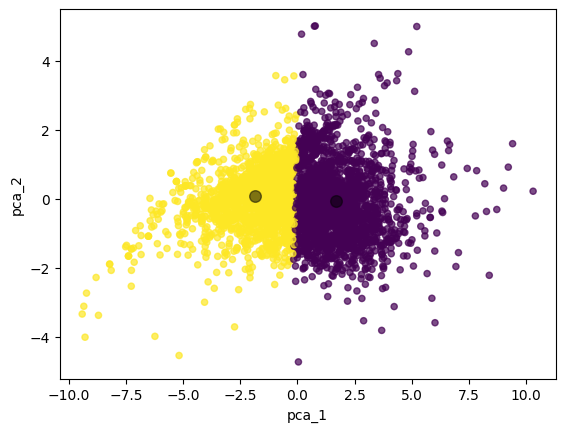

In [ ]:
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7)
# select cluster centers
centroids = kmeans.cluster_centers_
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*centroids.T, c='black', s=70, alpha=0.5);

In [ ]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)


Empty DataFrame
Columns: []
Index: [CustomersNb]

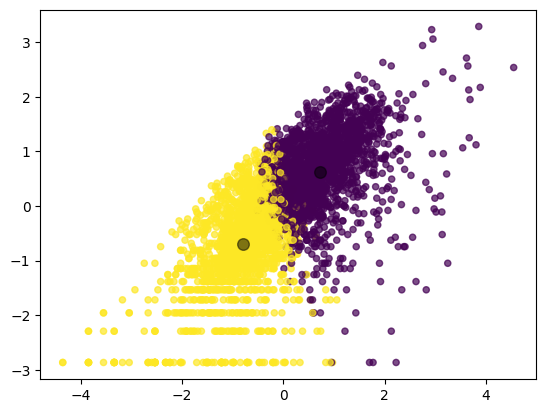

In [ ]:
#For comparison, if we run the K-Means algorithm without the PCA step, the result would be the following:

plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7)
# select cluster centers
centroids = pca.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

Elbow method


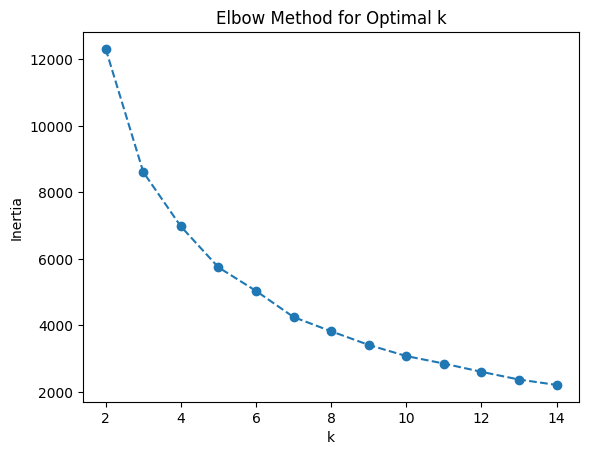

In [ ]:
plt.plot(*zip(*elbow.items()), marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.ylabel('Inertia')
plt.xlabel('k');

The silhouette score for k = 3 is: 0.3763502051479013
Cluster 0 avg silhouette: 0.3597561975652337
Cluster 1 avg silhouette: 0.3789173716691468
Cluster 2 avg silhouette: 0.4107778011292585
Total avg silhouette: 0.3766803500658274


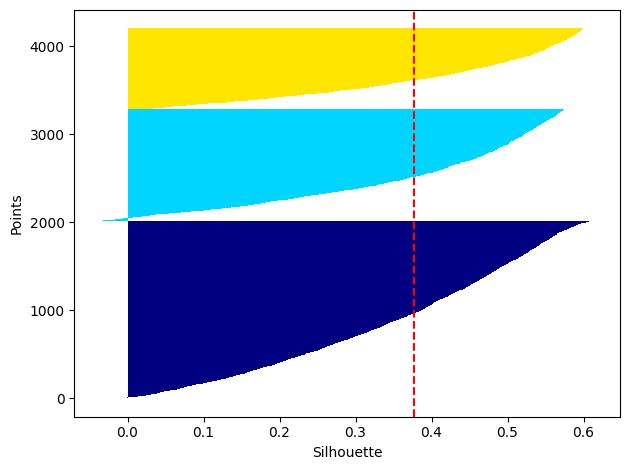

In [ ]:
print('The silhouette score for k = 3 is:', silhouette[3])
kmeans = KMeans(init='k-means++', n_clusters=3)
clusters_customers = kmeans.fit_predict(pca_customer_profile)
plot_silhouette_score(pca_customer_profile, clusters_customers)


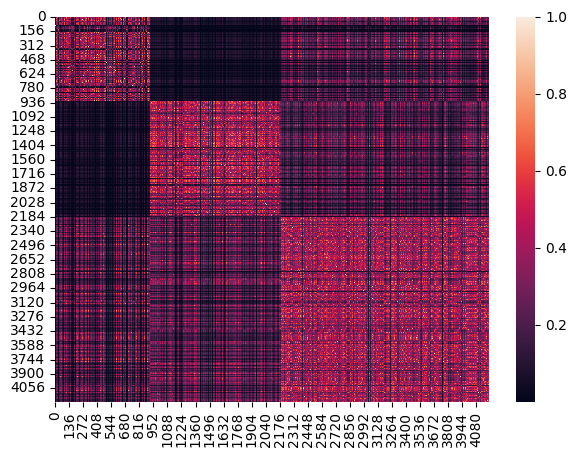

In [ ]:
plot_similarity_heatmap(customer_profile, clusters_customers)


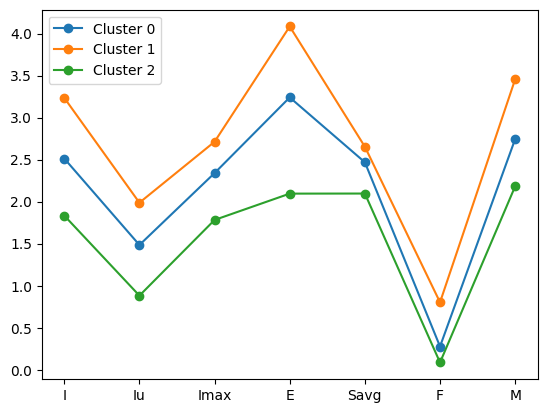

In [ ]:
plot_basic_statistics(customer_profile, clusters_customers, customer_profile.columns)


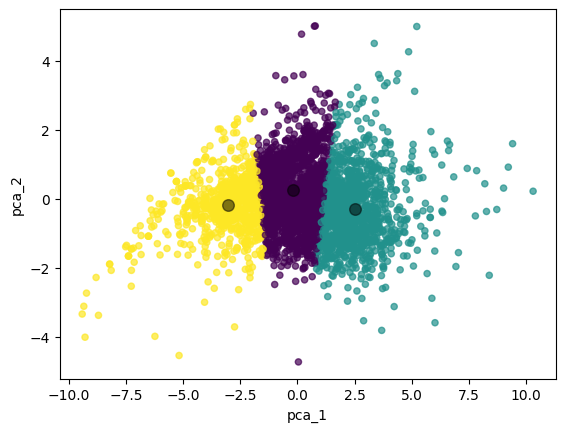

In [ ]:
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
# select cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(*centroids.T, c='black', s=70, alpha=0.5);

In [ ]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)


Empty DataFrame
Columns: []
Index: [CustomersNb]

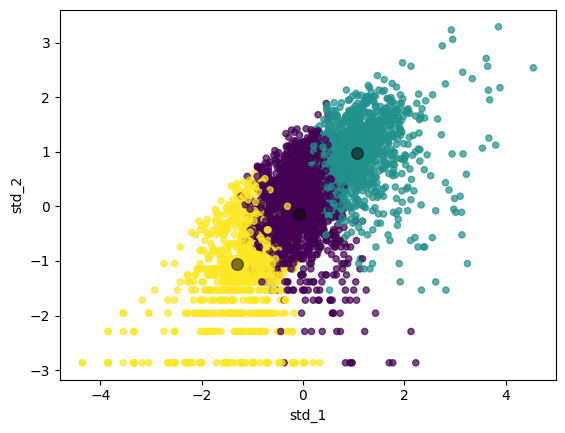

In [ ]:
#For comparison, if we run the K-Means algorithm without the PCA step, the result would be the following:

plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7)
plt.xlabel('std_1')
plt.ylabel('std_2')
# select cluster centers
centroids = pca.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

In [ ]:
customer_profile_kmeans = customer_profile.copy(deep=True)
customer_profile_kmeans['cluster'] = clusters_customers
customer_profile_kmeans['cluster'] = customer_profile_kmeans['cluster'].map({0: 'high', 1: 'low', 2: 'medium'}) # check clusters-labels mapping for each run!
customer_profile_kmeans

I        Iu      Imax         E      Savg         F  \
CustomerID                                                               
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080  0.778151   
...              ...       ...       ...       ...       ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054  0.477121   

                   M cluster  
CustomerID                    
12347.0     3.556087     low  
12348.0     2.894560    high  
12349.0     3.163623     low  
12350.0     2.468938    high  
12352.0     3.102231    high  
...              ...     ...  
18280.0     2.256718  medium  
18281.0     1.907519  medium  
18282.0     2.246991  medium  
18283.0     3.309541     low  
18287.0     3.264175     low  

[4205 rows x 8 columns]

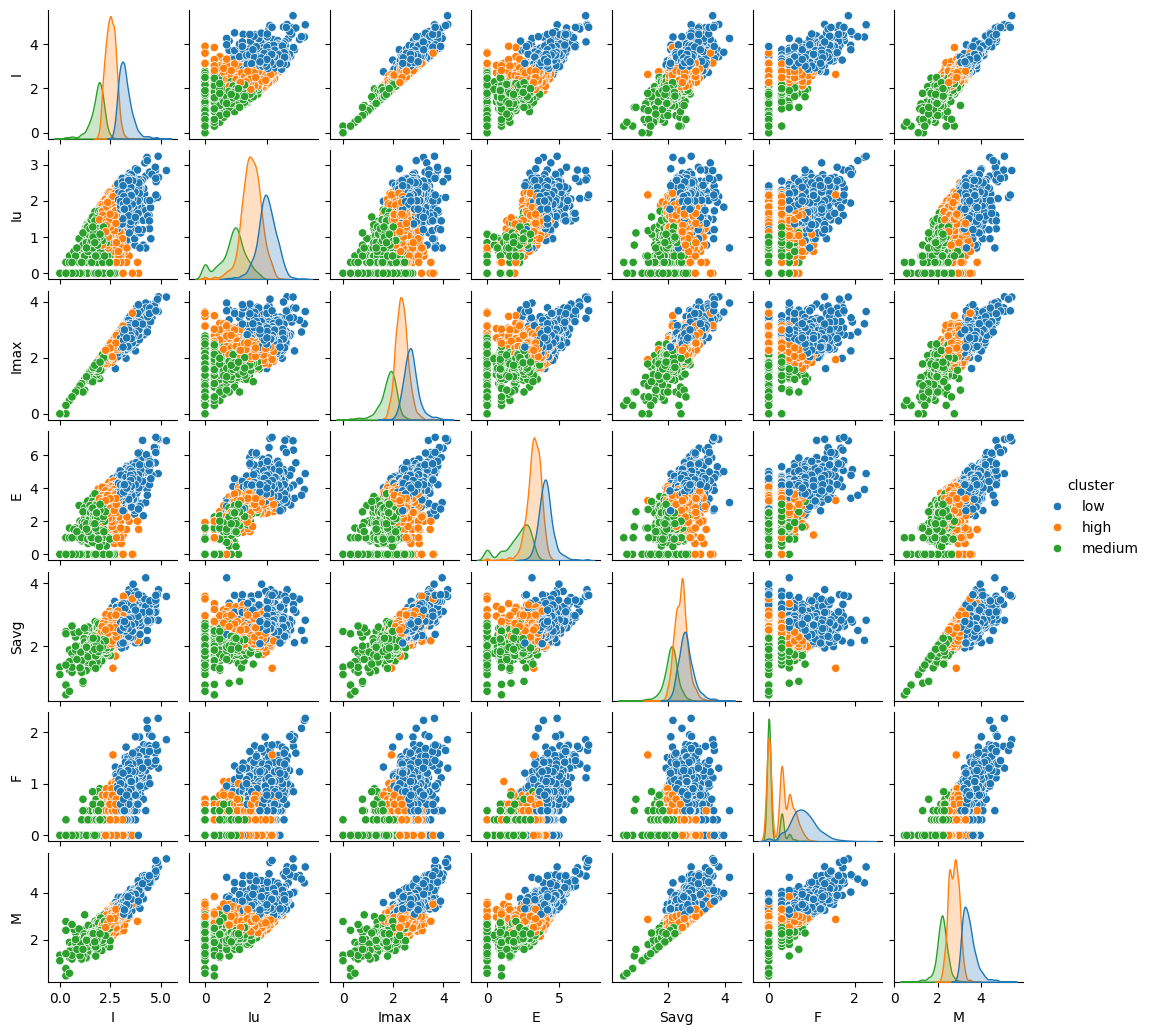

In [ ]:
sns.pairplot(customer_profile_kmeans, hue='cluster', diag_kind='kde', height=1.5);



In [ ]:
import pandas as pd
from scipy.stats import entropy

# Combine all features into customer_profile_fcmeans
customer_profile_fcmeans = I.merge(Iu, on='CustomerID') \
                            .merge(Imax, on='CustomerID') \
                            .merge(E, on='CustomerID') \
                            .merge(Savg, on='CustomerID') \
                            .merge(rfm, on='CustomerID')

# Set CustomerID as index
customer_profile_fcmeans = customer_profile_fcmeans.set_index('CustomerID')

# Save to CSV
output_path = 'customer_profile_fcmeans.csv'
customer_profile_fcmeans.to_csv(output_path, sep='\t')

# Display output path
output_path


'customer_profile_fcmeans.csv'

In [ ]:
print(customer_profile_fcmeans.head())

               I  Iu  Imax         E         Savg    R  F        M
CustomerID                                                        
12347.0     2139  87   676  4.239118   599.701667   40  6  3598.21
12348.0     1084   9   600  2.550341   261.480000   76  3   784.44
12349.0      630  72   630  3.903268  1457.550000   19  1  1457.55
12350.0      196  16   196  2.500000   294.400000  311  1   294.40
12352.0      463  57   125  3.158366   210.901667   73  6  1265.41


#Agglomerative Clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#Single Linkage



In [ ]:
single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')  # setting distance_threshold=0 ensures we compute the full tree
clusters_customers = single.fit_predict(pca_customer_profile)

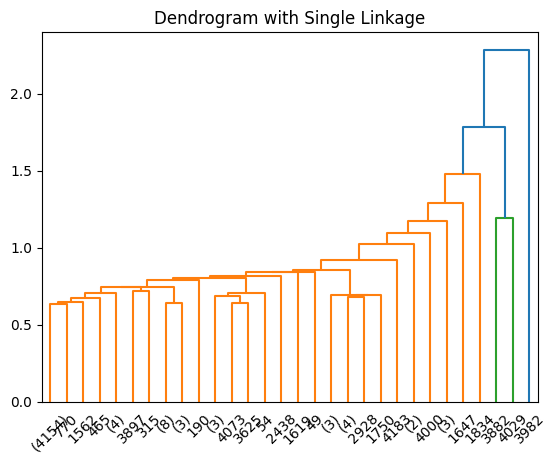

In [ ]:
plt.title('Dendrogram with Single Linkage')
plot_dendrogram(single, truncate_mode='lastp')  # plot the last p non-singleton clusters formed in the linkage



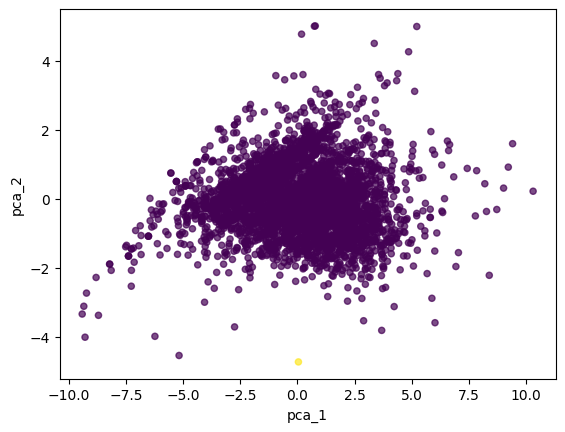

In [ ]:
single = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='single')
clusters_customers = single.fit_predict(pca_customer_profile)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);


#The central cluster is highly dense and contains the majority of the points.
#The outlier, represented by the yellow point, is distant from the main cluster,
# emphasizing the single linkage method's tendency to treat faraway points as separate entities,
# even in cases of noise or true outliers.

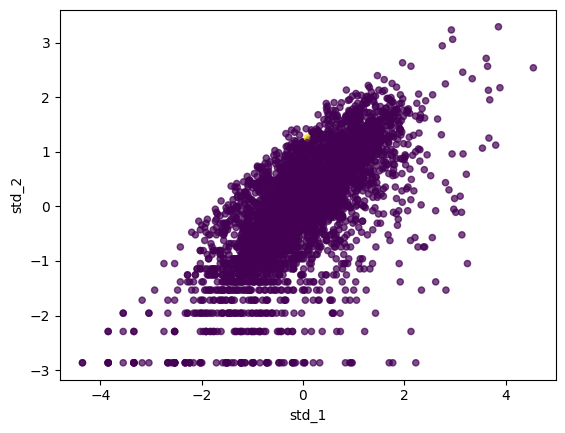

In [ ]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

#The scatter plot shows two clusters of standardized customer profiles: a dense central cluster (purple)
#  indicating similarity among most customers and a single outlier (yellow) representing a distinct profile.

In [ ]:
customer_profile_single = customer_profile.copy(deep=True)
customer_profile_single['cluster'] = clusters_customers
customer_profile_single['cluster'] = customer_profile_single['cluster']
customer_profile_single

I        Iu      Imax         E      Savg         F  \
CustomerID                                                               
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080  0.778151   
...              ...       ...       ...       ...       ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054  0.477121   

                   M  cluster  
CustomerID                     
12347.0     3.556087        0  
12348.0     2.894560        0  
12349.0     3.163623        0  
12350.0     2.468938        0  
12352.0     3.102231        0  
...              ...      ...  
18280.0     2.256718        0  
18281.0     1.907519        0  
18282.0     2.246991        0  
18283.0     3.309541        0  
18287.0     3.264175        0  

[4205 rows x 8 columns]

#Complete Linkage


In [ ]:
complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')  # setting distance_threshold=0 ensures we compute the full tree
clusters_customers = complete.fit_predict(pca_customer_profile)

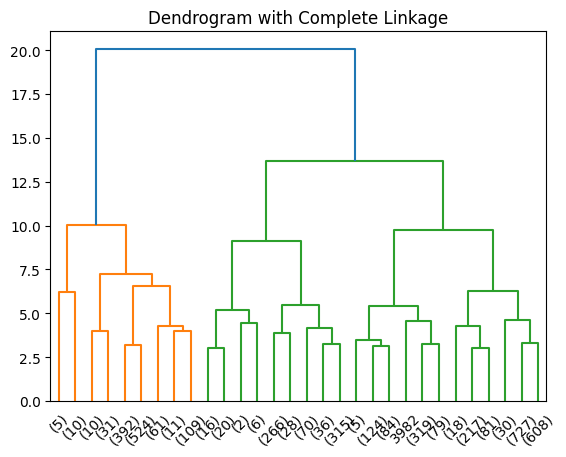

In [ ]:
plt.title('Dendrogram with Complete Linkage')
plot_dendrogram(complete, truncate_mode='lastp')

In [ ]:
complete = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='complete')
clusters_customers = complete.fit_predict(pca_customer_profile)

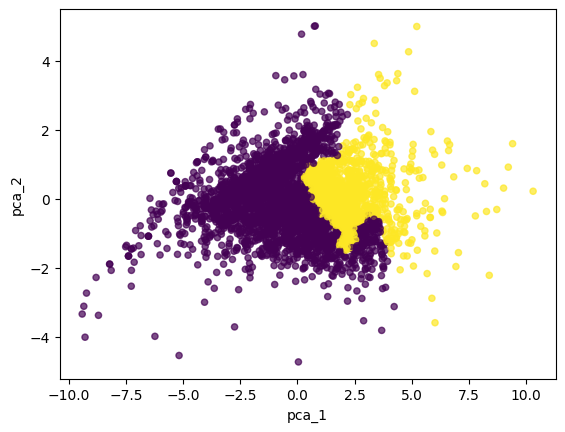

In [ ]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

For comparison, if we run the agglomerative clustering algorithm with the complete linkage without the PCA step, the result would be the following:



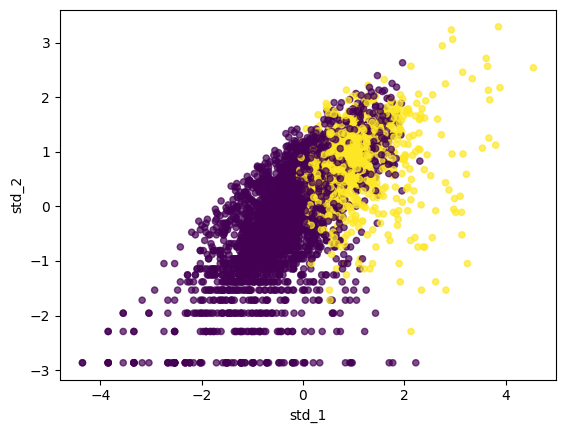

In [ ]:

plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);


#With PCA: Highlights the clusters more distinctly, reducing noise and redundancy in the data, which is useful for visualization and understanding key patterns.
#Without PCA: Retains the original feature space but may have overlapping clusters and higher noise, making it less interpretable for visualization.

In [ ]:
customer_profile_complete = customer_profile.copy(deep=True)
customer_profile_complete['cluster'] = clusters_customers
customer_profile_complete['cluster'] = customer_profile_complete['cluster']
customer_profile_complete

I        Iu      Imax         E      Savg         F  \
CustomerID                                                               
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080  0.778151   
...              ...       ...       ...       ...       ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054  0.477121   

                   M  cluster  
CustomerID                     
12347.0     3.556087        1  
12348.0     2.894560        0  
12349.0     3.163623        0  
12350.0     2.468938        0  
12352.0     3.102231        0  
...              ...      ...  
18280.0     2.256718        0  
18281.0     1.907519        0  
18282.0     2.246991        0  
18283.0     3.309541        0  
18287.0     3.264175        1  

[4205 rows x 8 columns]

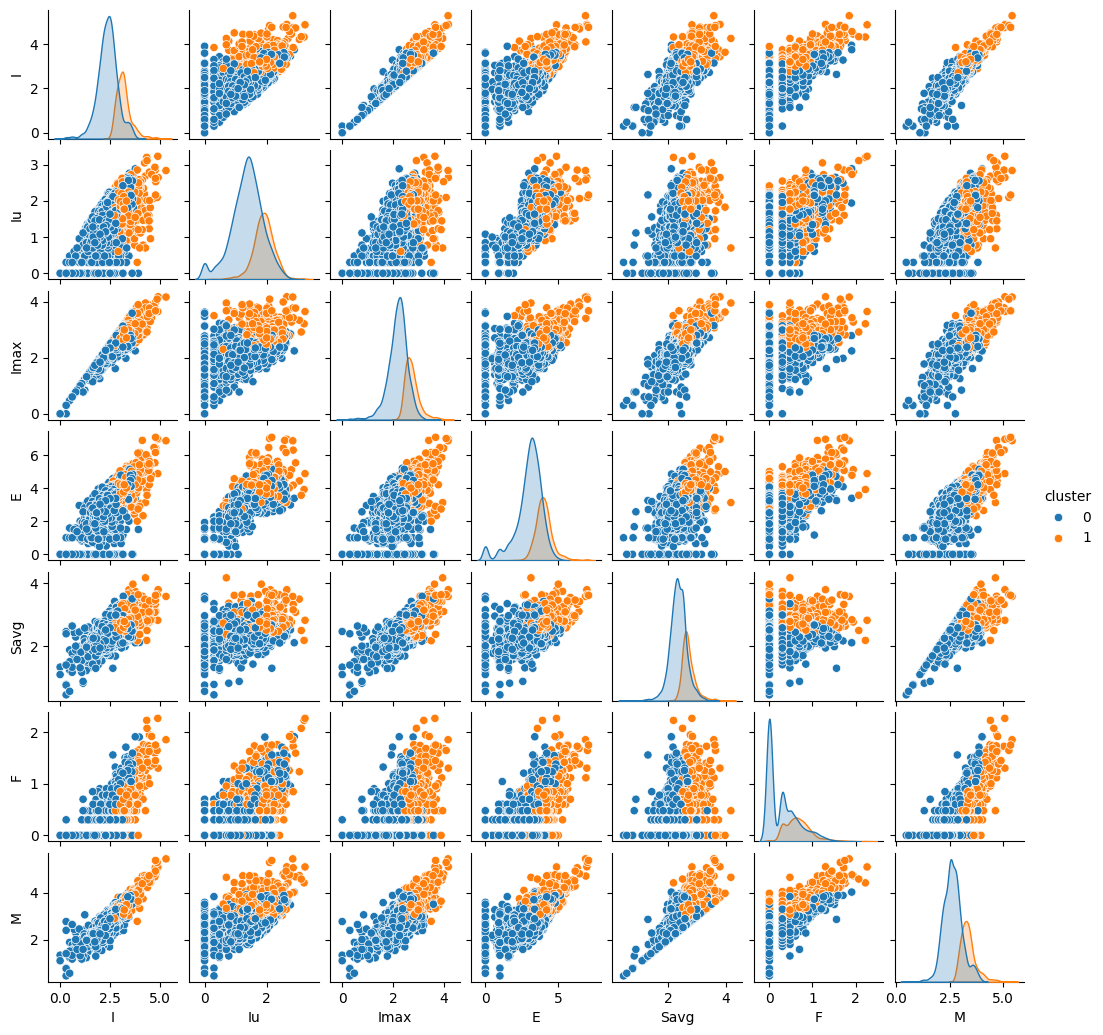

In [ ]:
sns.pairplot(customer_profile_complete, hue='cluster', diag_kind='kde', height=1.5);


#Average Linkage


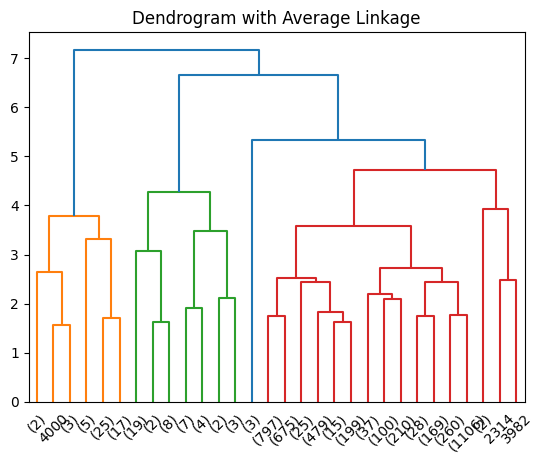

In [ ]:

avg = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')  # setting distance_threshold=0 ensures we compute the full tree
clusters_customers = avg.fit_predict(pca_customer_profile)

plt.title('Dendrogram with Average Linkage')
plot_dendrogram(avg, truncate_mode='lastp')

In [ ]:
avg = AgglomerativeClustering(distance_threshold=None, n_clusters=3, linkage='average')
clusters_customers = avg.fit_predict(pca_customer_profile)

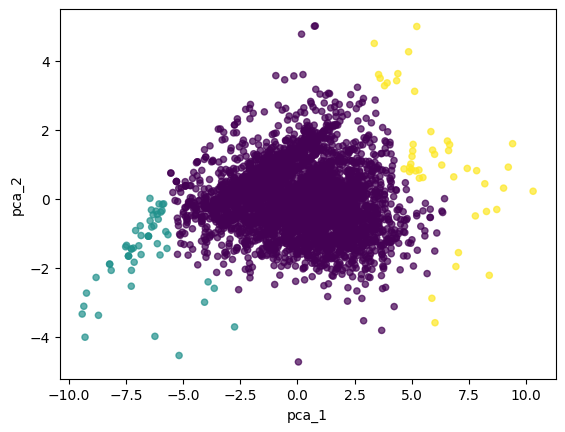

In [ ]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

For comparison, if we run the agglomerative clustering algorithm with the average linkage without the PCA step, the result would be the following:



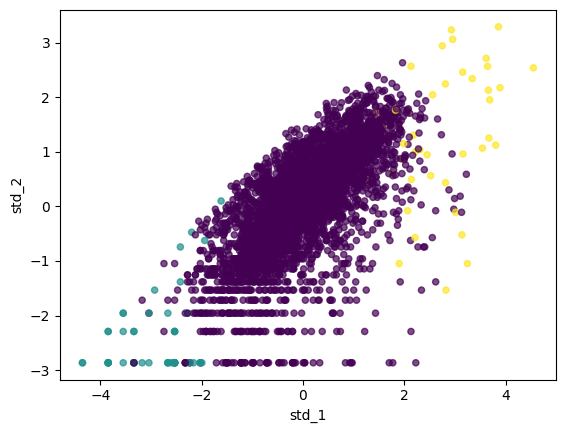

In [ ]:

plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [ ]:
customer_profile_avg = customer_profile.copy(deep=True)
customer_profile_avg['cluster'] = clusters_customers
customer_profile_avg['cluster'] = customer_profile_avg['cluster']
customer_profile_avg

I        Iu      Imax         E      Savg         F  \
CustomerID                                                               
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080  0.778151   
...              ...       ...       ...       ...       ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054  0.477121   

                   M  cluster  
CustomerID                     
12347.0     3.556087        0  
12348.0     2.894560        0  
12349.0     3.163623        0  
12350.0     2.468938        0  
12352.0     3.102231        0  
...              ...      ...  
18280.0     2.256718        0  
18281.0     1.907519        0  
18282.0     2.246991        0  
18283.0     3.309541        0  
18287.0     3.264175        0  

[4205 rows x 8 columns]

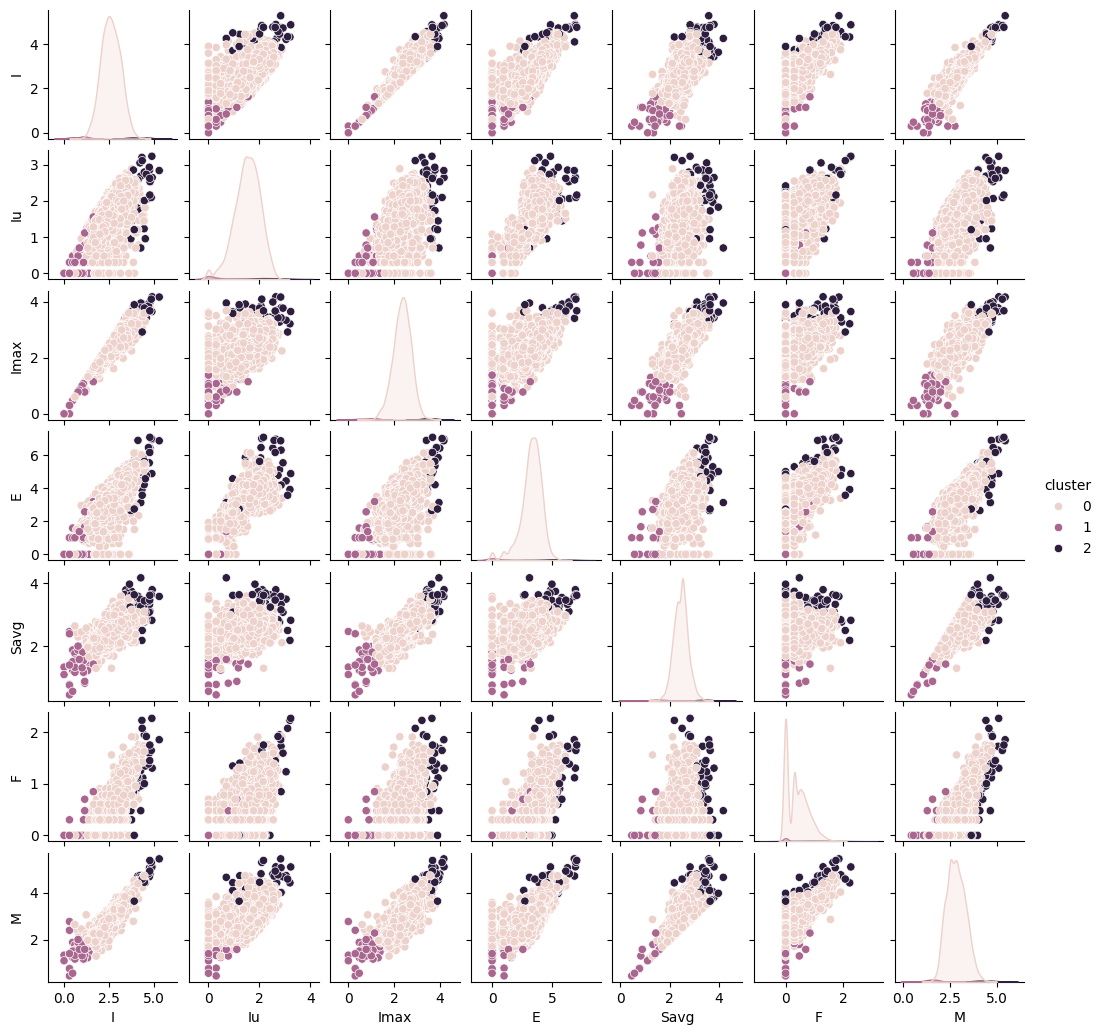

In [ ]:
sns.pairplot(customer_profile_avg, hue='cluster', diag_kind='kde', height=1.5);


#GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


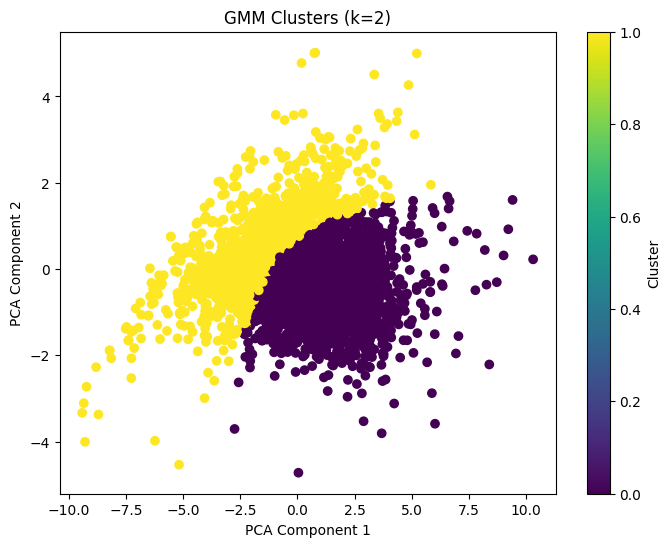

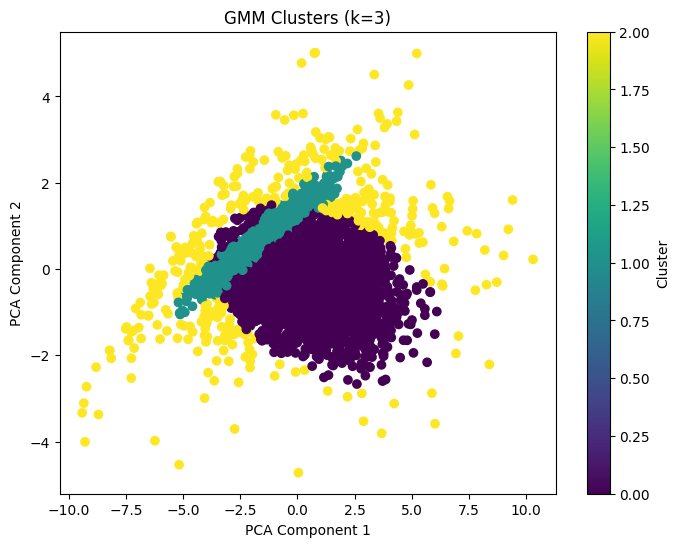

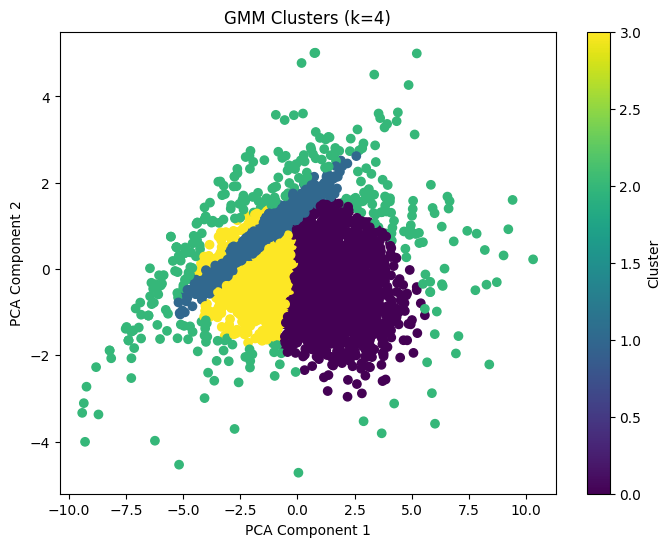

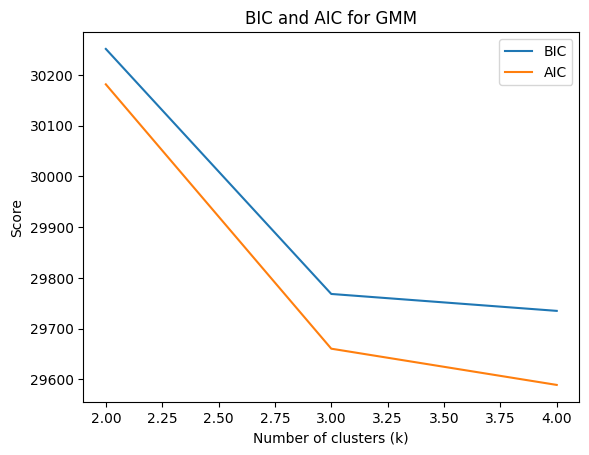

In [ ]:
# Fit GMM for different k values and store the results
gmm_results = {}
for k in range(2, 5):  # for different cluster sizes
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(pca_customer_profile)  # Use the PCA transformed data for clustering
    clusters = gmm.predict(pca_customer_profile)

    # Store GMM results
    gmm_results[k] = {
        'model': gmm,
        'clusters': clusters,
        'bic': gmm.bic(pca_customer_profile),
        'aic': gmm.aic(pca_customer_profile)
    }

    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_customer_profile[:, 0], pca_customer_profile[:, 1], c=clusters, cmap='viridis', label='Data points')
    plt.title(f'GMM Clusters (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Optionally, visualize the BIC (Bayesian Information Criterion) or AIC (Akaike Information Criterion)
# for model selection to determine the optimal number of clusters.
bic_values = [result['bic'] for result in gmm_results.values()]
aic_values = [result['aic'] for result in gmm_results.values()]

plt.plot(range(2, 5), bic_values, label='BIC')
plt.plot(range(2, 5), aic_values, label='AIC')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC for GMM')
plt.show()



#This plot shows the BIC and AIC values for GMM models with k = 2, 3, 4.   (MODEL FIT AIC /BIC)
#Both BIC and AIC values decrease as the number of clusters increases, but the rate of improvement slows after k = 3.
#This suggests that 3 clusters may be the optimal choice, as adding a fourth cluster doesn't significantly reduce the BIC/AIC.



#Cluster Visualization for k = 2:
#Two clusters are identified and visualized using GMM in the PCA-reduced space.
#The separation is clear, with a dense cluster on the left (purple) and another on the right (yellow).
#This visualization shows that two clusters are distinct, but finer granularity might reveal more meaningful groups.
#3. Cluster Visualization for k = 3:
#Three clusters are identified, with the yellow cluster from k=2 further split into two clusters (yellow and green).
#The addition of a third cluster captures more structure in the data, improving interpretability and fit.
#4. Cluster Visualization for k = 4:
#Four clusters are identified, splitting the central green cluster from k=3 into two smaller groups.
#While this improves granularity, it may not provide a significant advantage over k = 3 based on the BIC/AIC scores.






In [ ]:
df_cleaned = customer_profile_fcmeans.select_dtypes(include=['number'])

In [ ]:
df_cleaned = df_cleaned.fillna(0)  # Replace NaN with 0
# Alternatively, drop rows with NaN values: df_cleaned = df_cleaned.dropna()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned = scaler.fit_transform(df_cleaned)

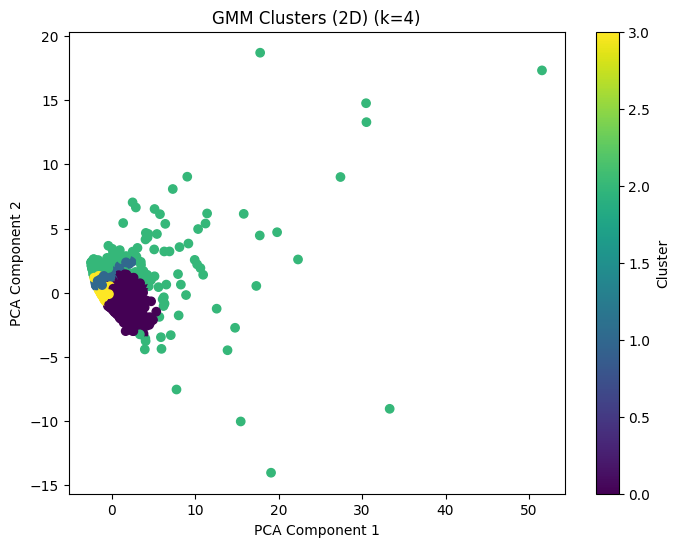

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Step 1: Prepare df_cleaned
df_cleaned = customer_profile_fcmeans.select_dtypes(include=['number'])  # Extract numeric columns
df_cleaned = df_cleaned.fillna(0)  # Handle missing values
scaler = StandardScaler()
df_cleaned = scaler.fit_transform(df_cleaned)  # Normalize the data

# Step 2: Apply PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_cleaned)

# Step 3: Identify the best GMM model based on BIC
best_k = min(gmm_results, key=lambda k: gmm_results[k]['bic'])
gmm_best = gmm_results[best_k]['model']

# Step 4: Predict clusters
gmm_clusters = gmm_best.predict(pca_transformed)

# Step 5: 2D Visualization using the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=gmm_clusters, cmap='viridis')
plt.title(f'GMM Clusters (2D) (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

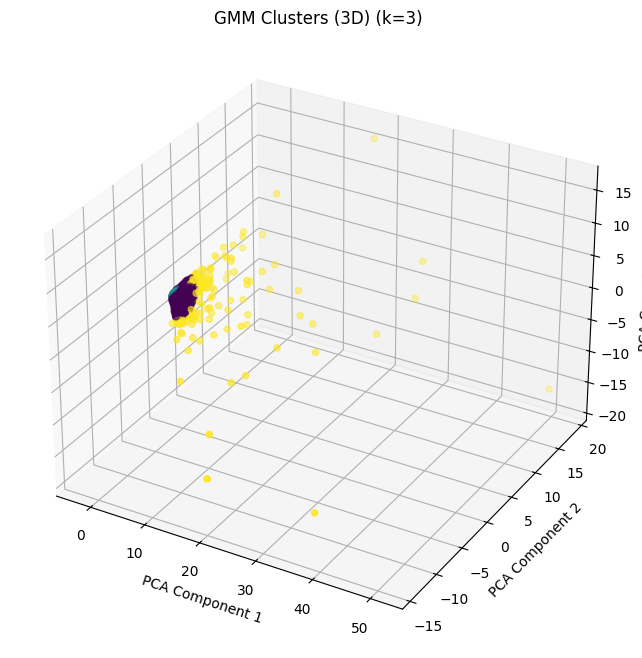

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply PCA transformation to 3 components for 3D visualization
pca = PCA(n_components=3)
pca_transformed_3d = pca.fit_transform(df_cleaned)

# Fit GMM to 3D data
best_k = 3  # Choose the number of clusters based on your previous analysis
gmm_best = GaussianMixture(n_components=best_k, covariance_type='full')
gmm_best.fit(pca_transformed_3d)

# Predict clusters
gmm_clusters = gmm_best.predict(pca_transformed_3d)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed_3d[:, 0], pca_transformed_3d[:, 1], pca_transformed_3d[:, 2], c=gmm_clusters, cmap='viridis')
ax.set_title(f'GMM Clusters (3D) (k={best_k})')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


#Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve

In [ ]:
df_customer_profile = pd.read_csv('customer_profile_kmeans.csv', sep='\t', index_col=0) # e.g., customer_profile_fcmeans or customer_profile_birch
df_customer_profile

I        Iu      Imax         E      Savg         F  \
CustomerID                                                               
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  0.000000   
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080  0.778151   
...              ...       ...       ...       ...       ...       ...   
18280.0     1.653213  1.000000  1.653213  1.846439  2.256718  0.000000   
18281.0     1.732394  0.845098  1.732394  1.842371  1.907519  0.000000   
18282.0     1.991226  1.079181  1.845098  3.022055  1.945961  0.301030   
18283.0     3.131939  2.418301  2.382017  2.627193  2.105421  1.204120   
18287.0     3.200303  1.770852  2.995635  4.198218  2.787054  0.477121   

                   M cluster  
CustomerID                    
12347.0     3.556087    high  
12348.0     2.894560  medium  
12349.0     3.163623    high  
12350.0     2.468938  medium  
12352.0     3.102231  medium  
...              ...     ...  
18280.0     2.256718     low  
18281.0     1.907519     low  
18282.0     2.246991     low  
18283.0     3.309541    high  
18287.0     3.264175    high  

[4205 rows x 8 columns]

In [ ]:
customer_profile = df_customer_profile.to_numpy()


In [ ]:
def plot_learning_curve(pipeline, X, y, scorer='accuracy', cv=5, train_sizes=np.linspace(.1, 1.0, 5),
                        shuffle=False, random_state=None):

    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, train_sizes=train_sizes, cv=cv,
                                                            scoring=scorer, n_jobs=-1, shuffle=shuffle,
                                                            random_state=random_state)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title(str(pipeline['estimator'].__class__.__name__) + ' learning curve')
    plt.xlabel('training set size')
    plt.ylabel('score')

    plt.plot(train_sizes, mean_train_score, label='train score', color='navy', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_train_score + std_train_score,
                     mean_train_score - std_train_score, color='navy', alpha=0.2)
    plt.plot(train_sizes, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_test_score + std_test_score,
                     mean_test_score - std_test_score, color='darkorange', alpha=0.2)

    plt.legend(loc='lower right').get_frame().set_facecolor('white')


def plot_validation_curve(pipeline, X, y, param_grid, param_name, scorer='accuracy', cv=5):

    param_range = param_grid[param_name]
    train_scores, test_scores = validation_curve(pipeline, X, y, param_name=param_name, param_range=param_range,
                                                 cv=cv, scoring=scorer, n_jobs=-1)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title(str(pipeline['estimator'].__class__.__name__) + ' validation curve')
    plt.xlabel(param_name)
    plt.ylabel('score')

    plt.plot(param_range, mean_train_score, label='training score', color='navy', marker='.', lw=2)
    plt.fill_between(param_range, mean_train_score - std_train_score,
                     mean_train_score + std_train_score, alpha=0.2, color='navy')
    plt.plot(param_range, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(param_range, mean_test_score - std_test_score,
                     mean_test_score + std_test_score, alpha=0.2, color='darkorange')

    plt.legend(loc='lower right').get_frame().set_facecolor('white')


def print_pretty_cv_results(grid):
    df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
    df['params'] = df['params'].apply(lambda param_dict: {k.replace('estimator__', ''): v for k, v in param_dict.items()})
    df.rename(columns={'mean_test_score': 'mean_val_score',
                       'rank_test_score': 'rank_val_score'}, inplace=True)

    def highlight_equal(s, value, column):
        is_max = pd.Series(data=False, index=s.index)
        is_max[column] = s.loc[column] == value
        return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

    return df.head(15).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

In [ ]:
#Splitting train and test set
X, y = customer_profile[:, :-1], customer_profile[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)


#Support Vector Classifier


In [ ]:
#SVM is a supervised learning algorithm that finds the optimal hyperplane to separate classes in the feature space.
from sklearn.svm import SVC
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('estimator', SVC())])

tuned_parameters = {'estimator__C': (1, 10, 100, 1000)}

svc_grid = GridSearchCV(pipeline,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# Function to print the CV results in a pretty format
def print_pretty_cv_results(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    results = results[['param_estimator__C', 'mean_test_score', 'std_test_score',
                       'mean_train_score', 'std_train_score', 'rank_test_score']]
    print("\nCross-Validation Results:\n")
    print(results.sort_values(by='rank_test_score'))

# Print the cross-validation results
print_pretty_cv_results(svc_grid)

# After the grid search, we can evaluate the best model
best_model = svc_grid.best_estimator_
y_pred = best_model.predict(X_test)
print("\nBest Model Performance on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")




Cross-Validation Results:

   param_estimator__C  mean_test_score  std_test_score  mean_train_score  \
1                  10         0.992389        0.005341          0.996908   
2                 100         0.992073        0.004702          0.998652   
0                   1         0.989536        0.002934          0.992785   
3                1000         0.988587        0.006446          0.999524   

   std_train_score  rank_test_score  
1         0.000634                1  
2         0.000691                2  
0         0.001798                3  
3         0.000297                4  

Best Model Performance on Test Data:
Accuracy: 0.9933


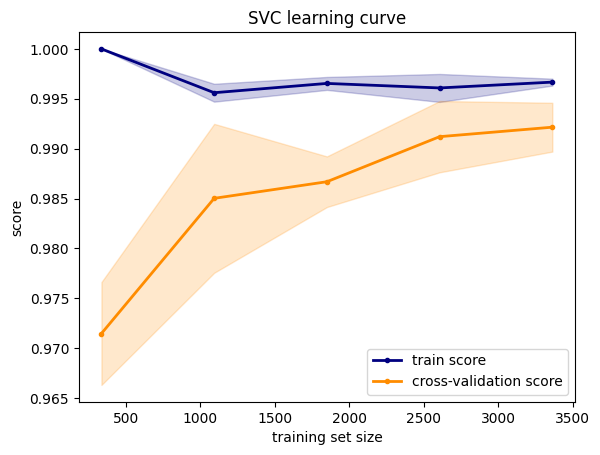

In [ ]:
plot_learning_curve(svc_grid.best_estimator_, X, y)


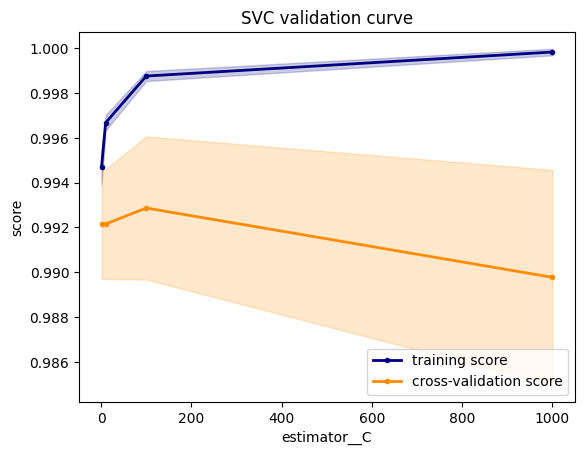

In [ ]:
plot_validation_curve(svc_grid.best_estimator_, X, y, param_grid=tuned_parameters, param_name='estimator__C')


Evaluation on the test set


In [ ]:
y_pred = svc_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9933460076045627

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       0.99      1.00      1.00       313
         low       0.99      0.99      0.99       232
      medium       0.99      0.99      0.99       507

    accuracy                           0.99      1052
   macro avg       0.99      0.99      0.99      1052
weighted avg       0.99      0.99      0.99      1052



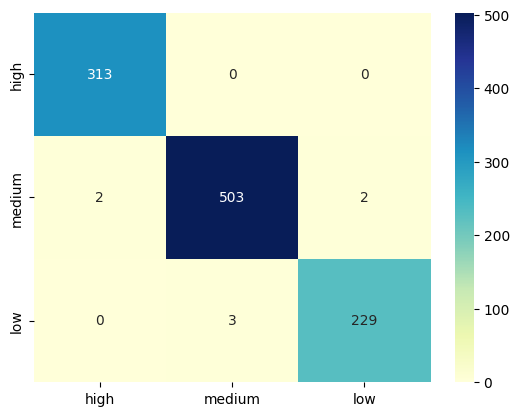

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=['high', 'medium', 'low']),
                         columns=['high', 'medium', 'low'], index=['high', 'medium', 'low'])
sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');



#Naive Bayes


In [ ]:
#Naive Bayes is a probabilistic classifier based on Bayes' theorem. Assumes that all features are independent (hence "naive"), which simplifies calculations
from sklearn.naive_bayes import GaussianNB


In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('estimator', GaussianNB())])

gnb_grid = GridSearchCV(pipeline,
                        param_grid={},
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
# Function to print the CV results in a pretty format
def print_pretty_cv_results(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    results = results[['mean_test_score', 'std_test_score',
                       'mean_train_score', 'std_train_score', 'rank_test_score']]
    print("\nCross-Validation Results:\n")
    print(results.sort_values(by='rank_test_score'))

# Print the cross-validation results
print_pretty_cv_results(gnb_grid)

# After the grid search, we can evaluate the best model
best_model = gnb_grid.best_estimator_
y_pred = best_model.predict(X_test)
print("\nBest Model Performance on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Cross-Validation Results:

   mean_test_score  std_test_score  mean_train_score  std_train_score  \
0         0.967965        0.010587          0.970821         0.001053   

   rank_test_score  
0                1  

Best Model Performance on Test Data:
Accuracy: 0.9791


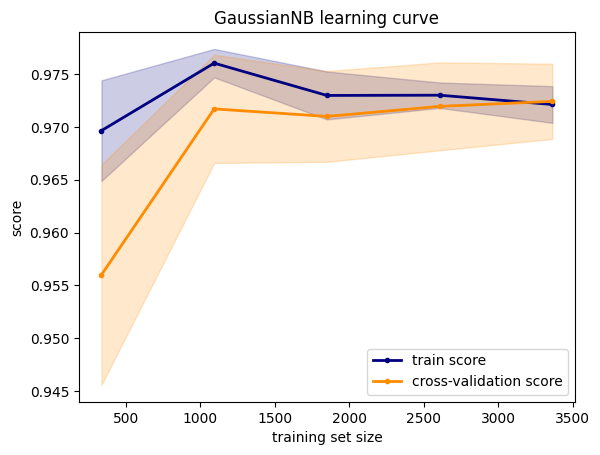

In [ ]:
plot_learning_curve(gnb_grid.best_estimator_, X, y)

In [ ]:
#Evaluation on the test set
y_pred = gnb_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9790874524714829

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       0.98      0.98      0.98       313
         low       0.97      0.98      0.98       232
      medium       0.98      0.98      0.98       507

    accuracy                           0.98      1052
   macro avg       0.98      0.98      0.98      1052
weighted avg       0.98      0.98      0.98      1052



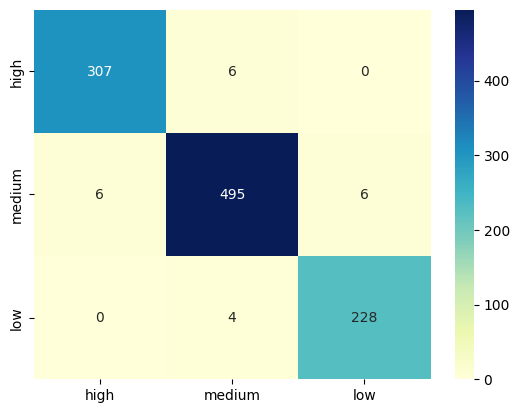

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=['high', 'medium', 'low']),
                         columns=['high', 'medium', 'low'], index=['high', 'medium', 'low'])
sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');



In [ ]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


#pattern Mining

In [ ]:
# Import necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules

# Create a basket representation (pivot table)
basket_data = df.pivot_table(index='BasketID', columns='ProdID', values='Qta', aggfunc='sum', fill_value=0)
basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)  # Convert quantities to binary (1 if purchased, 0 otherwise)

# Display the prepared basket data
print("\nBasket Data (Binary Representation):")
print(basket_data.head())

/tmp/ipykernel_508/417063852.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)  # Convert quantities to binary (1 if purchased, 0 otherwise)



Basket Data (Binary Representation):
ProdID    10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
BasketID                                                                     
539993        0      0      0       0       0       0      0      0      0   
540001        0      0      0       0       0       0      0      0      0   
540002        0      0      0       0       0       0      0      0      0   
540003        0      0      0       0       0       0      0      0      0   
540004        0      0      0       0       0       0      0      0      0   

ProdID    11001  ...  90214O  90214P  90214R  90214S  90214T  90214U  90214V  \
BasketID         ...                                                           
539993        0  ...       0       0       0       0       0       0       0   
540001        0  ...       0       0       0       0       0       0       0   
540002        0  ...       0       0       0       0       0       0       0   
540003        0

In [ ]:
# Find frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)

# Display frequent itemsets
print("\nFrequent Itemsets:")
print(frequent_itemsets.head())


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Frequent Itemsets:
    support   itemsets
0  0.018499    (15036)
1  0.015426  (15056BL)
2  0.020745   (15056N)
3  0.014480   (16161P)
4  0.011584    (17003)


In [ ]:
# Generate association rules
num_itemsets = frequent_itemsets['support'].count()
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Display association rules
print("\nAssociation Rules:")
print(rules.head())



Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0     (22386)     (20712)            0.049113            0.027778  0.010993   
1     (20712)     (22386)            0.027778            0.049113  0.010993   
2    (85099B)     (20712)            0.089125            0.027778  0.014657   
3     (20712)    (85099B)            0.027778            0.089125  0.014657   
4    (85099B)     (20713)            0.089125            0.022104  0.010461   

   confidence      lift  representativity  leverage  conviction  \
0    0.223827  8.057762               1.0  0.009629    1.252584   
1    0.395745  8.057762               1.0  0.009629    1.573650   
2    0.164456  5.920424               1.0  0.012182    1.163580   
3    0.527660  5.920424               1.0  0.012182    1.928428   
4    0.117374  5.310075               1.0  0.008491    1.107939   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.921136  0.166816   0.201650    0.309786 

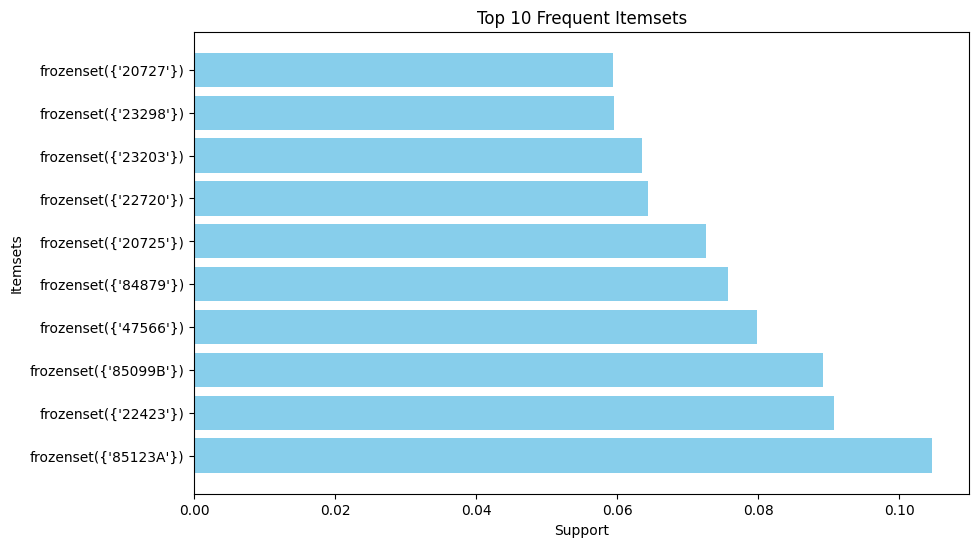

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 frequent itemsets
top_itemsets = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()


In [ ]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


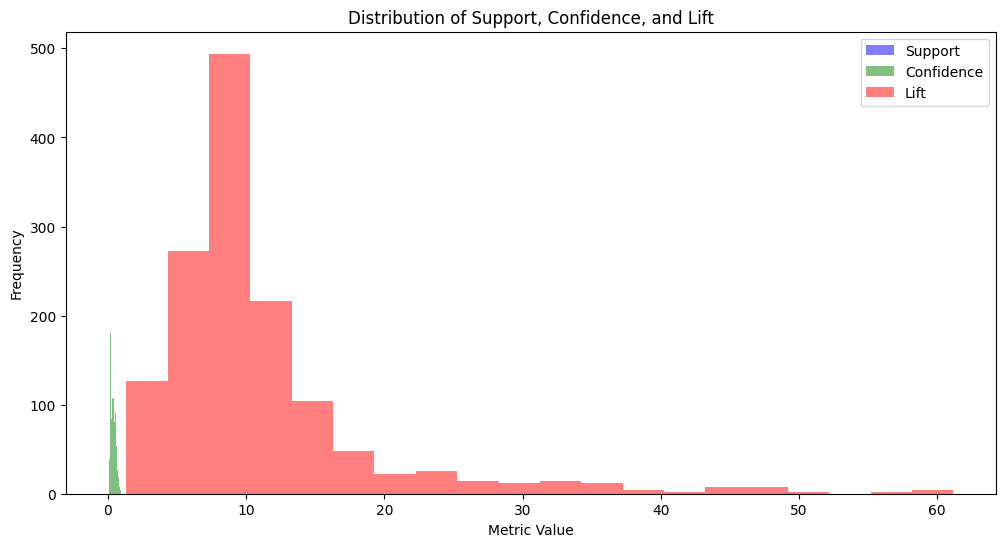

In [ ]:
# Plot the distribution of metrics
plt.figure(figsize=(12, 6))
plt.hist(rules['support'], bins=20, alpha=0.5, label='Support', color='blue')
plt.hist(rules['confidence'], bins=20, alpha=0.5, label='Confidence', color='green')
plt.hist(rules['lift'], bins=20, alpha=0.5, label='Lift', color='red')
plt.xlabel('Metric Value')
plt.ylabel('Frequency')
plt.title('Distribution of Support, Confidence, and Lift')
plt.legend()
plt.show()


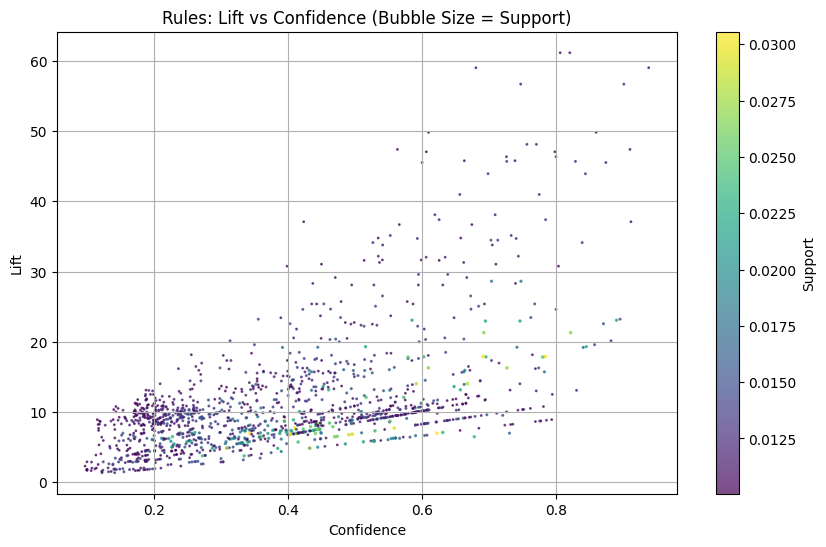

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, c=rules['support'], cmap='viridis', s=rules['support'] * 100)
plt.colorbar(label='Support')
plt.title('Rules: Lift vs Confidence (Bubble Size = Support)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid()
plt.show()

In [ ]:
!pip install community

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.4 MB/s eta 0:00:00
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2137 sha256=b884847b1a026bed919eb17044e9812bac7658718fc4128a974774c0f031bd05
  Stored in directory: /root/.cache/pip/wheels/b7/c9/3f/e222b011e31d3d1de1fd799caed228f770d56f66563014285d
Successfully built community
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.1
    Uninstalling Werkzeug-3.0.1:
      Successfully uninstalled Werkzeug-3.0.1
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
ERROR: Cannot uninstall 'blinker'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.

[notic

In [ ]:
!pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=7fc52632101cb100761c8bf7ef68d85b50617965801fb3e6ac8d44d2f16a5743
  Stored in directory: /root/.cache/pip/wheels/11/c1/e7/f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


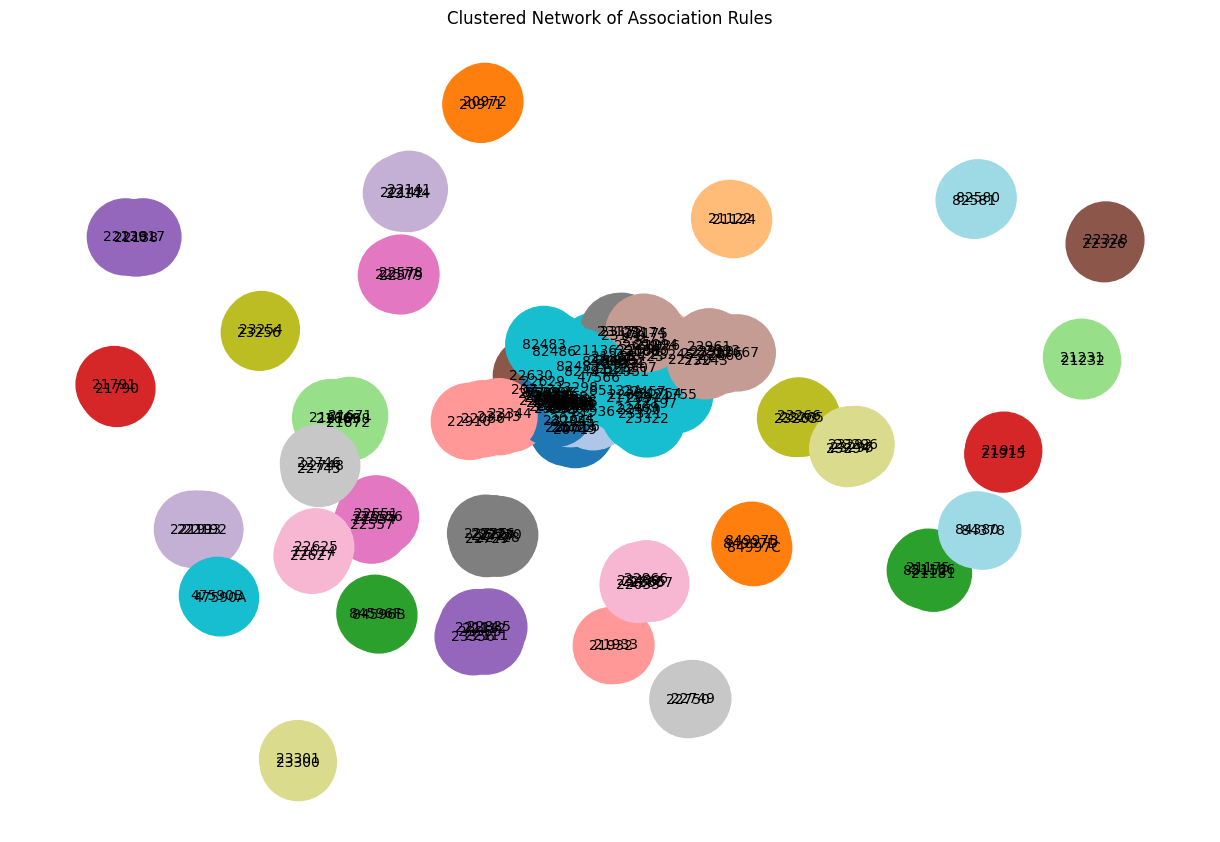

In [ ]:
import community as community_louvain  # For clustering (install using pip install python-louvain)

# Create the graph
G = nx.DiGraph()
for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

# Community detection for clustering
partition = community_louvain.best_partition(G.to_undirected())

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(partition.values()), cmap='tab20', edge_color='gray', node_size=3000, font_size=10)
plt.title('Clustered Network of Association Rules')
plt.show()


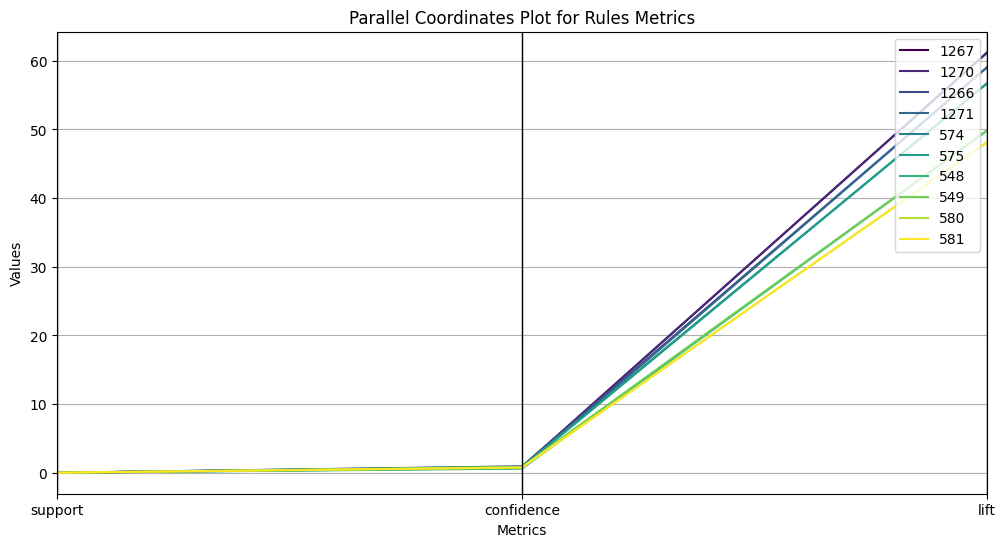

In [ ]:
from pandas.plotting import parallel_coordinates

# Select top rules by lift for better visualization
top_rules = rules.nlargest(10, 'lift')
parallel_data = top_rules[['support', 'confidence', 'lift']].reset_index()

plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, class_column='index', colormap='viridis')
plt.title('Parallel Coordinates Plot for Rules Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()


In [ ]:
#Predictive modelling

In [ ]:
#Model Development

In [ ]:
import pandas as pd

# Load the processed customer profile dataset
customer_profile = pd.read_csv('customer_profile_model.csv', sep='\t', index_col=0)

# Display dataset overview
print(customer_profile.info())
print(customer_profile.head())


<class 'pandas.core.frame.DataFrame'>
Index: 4205 entries, 12347.0 to 18287.0
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       4205 non-null   float64
 1   Iu      4205 non-null   float64
 2   Imax    4205 non-null   float64
 3   E       4205 non-null   float64
 4   Savg    4205 non-null   float64
 5   R       4205 non-null   int64  
 6   F       4205 non-null   float64
 7   M       4205 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 295.7 KB
None
                   I        Iu      Imax         E      Savg    R         F  \
CustomerID                                                                    
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935   40  0.778151   
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438   76  0.477121   
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623   19  0.000000   
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  311  0

In [ ]:
# Define target variable: high spender (1) or not (0)
threshold = customer_profile['M'].median()  # Use median as a threshold
customer_profile['HighSpender'] = (customer_profile['M'] > threshold).astype(int)

# Drop unnecessary columns
X = customer_profile.drop(columns=['M', 'HighSpender'])
y = customer_profile['HighSpender']

# Display feature-target relationship
print(X.head())
print(y.value_counts())


                   I        Iu      Imax         E      Savg    R         F
CustomerID                                                                 
12347.0     3.330211  1.939519  2.829947  4.239118  2.777935   40  0.778151
12348.0     3.035029  0.954243  2.778151  2.550341  2.417438   76  0.477121
12349.0     2.799341  1.857332  2.799341  3.903268  3.163623   19  0.000000
12350.0     2.292256  1.204120  2.292256  2.500000  2.468938  311  0.000000
12352.0     2.665581  1.755875  2.096910  3.158366  2.324080   73  0.778151
HighSpender
0    2103
1    2102
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (2943, 7)
Test set size: (1262, 7)


In [ ]:
#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       631
           1       0.97      0.98      0.98       631

    accuracy                           0.98      1262
   macro avg       0.98      0.98      0.98      1262
weighted avg       0.98      0.98      0.98      1262

ROC AUC Score: 0.9976542152546333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


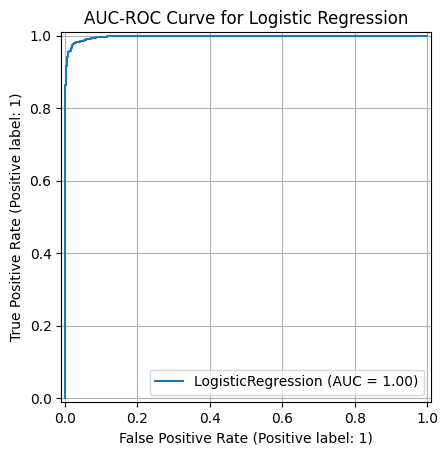

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the AUC-ROC curve for logistic regression
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

# Customize the plot
plt.title("AUC-ROC Curve for Logistic Regression")
plt.grid()
plt.show()


In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       631
           1       0.99      0.99      0.99       631

    accuracy                           0.99      1262
   macro avg       0.99      0.99      0.99      1262
weighted avg       0.99      0.99      0.99      1262

ROC AUC Score: 0.99887608279063


In [ ]:
#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluate
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       631

    accuracy                           1.00      1262
   macro avg       1.00      1.00      1.00      1262
weighted avg       1.00      1.00      1.00      1262

ROC AUC Score: 0.9999748845316342


In [ ]:
#SVM

In [ ]:
from sklearn.svm import SVC

# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))


SVM Performance:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       631
           1       0.67      0.81      0.73       631

    accuracy                           0.70      1262
   macro avg       0.71      0.70      0.70      1262
weighted avg       0.71      0.70      0.70      1262

ROC AUC Score: 0.8391756098663605


In [ ]:
#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Network
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate
print("Neural Network Performance:")
print(classification_report(y_test, y_pred_mlp))
print("ROC AUC Score:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))


Neural Network Performance:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       631
           1       0.87      0.98      0.92       631

    accuracy                           0.92      1262
   macro avg       0.93      0.92      0.92      1262
weighted avg       0.93      0.92      0.92      1262

ROC AUC Score: 0.9912196322593122


In [ ]:
#Hyperparameter tuning (Model Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best ROC AUC Score:", grid_rf.best_score_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best ROC AUC Score: 0.9976987128863765


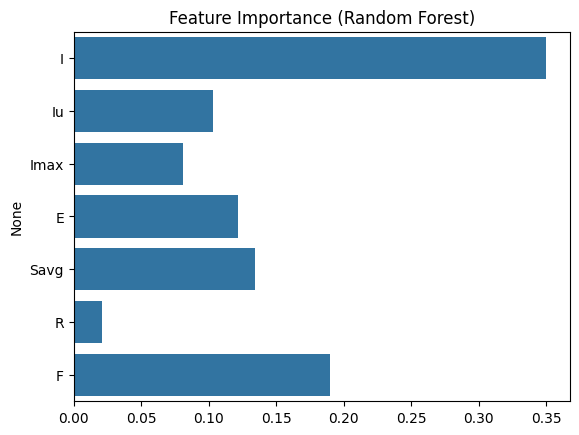

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = rf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.show()


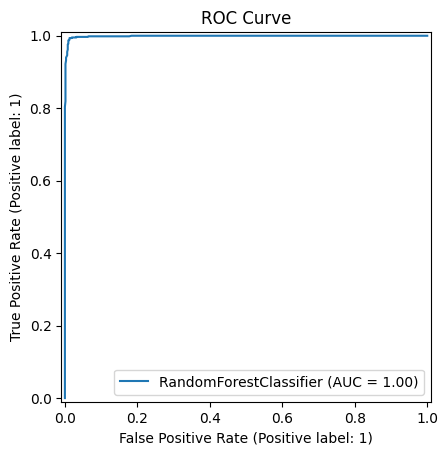

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [ ]:
# New input data (example)
new_data = pd.DataFrame({
    'I': [10],
    'Iu': [5],
    'Imax': [3],
    'E': [0.5],
    'Savg': [15],
    'R': [10],
    'F': [7]
})


In [ ]:
#Logistic Regression

In [ ]:
# Predict the class (High Spender or Not)
log_pred_class = log_reg.predict(new_data)
print("Logistic Regression Predicted Class:", log_pred_class)

# Predict the probability for each class
log_pred_proba = log_reg.predict_proba(new_data)
print("Logistic Regression Predicted Probabilities:", log_pred_proba)


Logistic Regression Predicted Class: [1]
Logistic Regression Predicted Probabilities: [[0. 1.]]


In [ ]:
# Random Forest

In [ ]:
# Predict the class
rf_pred_class = rf.predict(new_data)
print("Random Forest Predicted Class:", rf_pred_class)

# Predict the probability for each class
rf_pred_proba = rf.predict_proba(new_data)
print("Random Forest Predicted Probabilities:", rf_pred_proba)


Random Forest Predicted Class: [1]
Random Forest Predicted Probabilities: [[0.04 0.96]]


In [ ]:
#Gradient Boosting

In [ ]:
# Predict the class
gb_pred_class = gb.predict(new_data)
print("Gradient Boosting Predicted Class:", gb_pred_class)

# Predict the probability for each class
gb_pred_proba = gb.predict_proba(new_data)
print("Gradient Boosting Predicted Probabilities:", gb_pred_proba)


Gradient Boosting Predicted Class: [1]
Gradient Boosting Predicted Probabilities: [[2.41145653e-04 9.99758854e-01]]


In [ ]:
#SVM

In [ ]:
# Predict the class
svm_pred_class = svm.predict(new_data)
print("SVM Predicted Class:", svm_pred_class)

# Predict the probability for each class
svm_pred_proba = svm.predict_proba(new_data)
print("SVM Predicted Probabilities:", svm_pred_proba)


SVM Predicted Class: [1]
SVM Predicted Probabilities: [[0.12251269 0.87748731]]


In [ ]:
#Neural Network

In [ ]:
# Predict the class
mlp_pred_class = mlp.predict(new_data)
print("Neural Network Predicted Class:", mlp_pred_class)

# Predict the probability for each class
mlp_pred_proba = mlp.predict_proba(new_data)
print("Neural Network Predicted Probabilities:", mlp_pred_proba)


Neural Network Predicted Class: [1]
Neural Network Predicted Probabilities: [[0. 1.]]


In [ ]:
# Simulated input data for prediction
low_spender_data = pd.DataFrame({
    'I': [2],       # Low total quantity
    'Iu': [1],      # Low unique products
    'Imax': [1],    # Low maximum quantity in a single basket
    'E': [0.1],     # Low entropy of spending
    'Savg': [5],    # Low average sale per basket
    'R': [30],      # Higher recency (long time since last purchase)
    'F': [1]        # Low frequency of purchases
})


In [ ]:
# Predict class (High Spender or Not)
low_spender_pred_class = log_reg.predict(low_spender_data)
print("\nLogistic Regression Predicted Class (0 = Not High Spender):", low_spender_pred_class)

# Predict probability of being a High Spender
low_spender_pred_proba = log_reg.predict_proba(low_spender_data)
print("\nLogistic Regression Predicted Probabilities (Class 0 and 1):")
print(low_spender_pred_proba)



Logistic Regression Predicted Class (0 = Not High Spender): [1]

Logistic Regression Predicted Probabilities (Class 0 and 1):
[[1.72084569e-13 1.00000000e+00]]


In [ ]:
# Random Forest
rf_pred_class = rf.predict(low_spender_data)
rf_pred_proba = rf.predict_proba(low_spender_data)
print("\nRandom Forest Predicted Class (0 = Not High Spender):", rf_pred_class)
print("Random Forest Predicted Probabilities:", rf_pred_proba)

# Gradient Boosting
gb_pred_class = gb.predict(low_spender_data)
gb_pred_proba = gb.predict_proba(low_spender_data)
print("\nGradient Boosting Predicted Class (0 = Not High Spender):", gb_pred_class)
print("Gradient Boosting Predicted Probabilities:", gb_pred_proba)

# SVM
svm_pred_class = svm.predict(low_spender_data)
svm_pred_proba = svm.predict_proba(low_spender_data)
print("\nSVM Predicted Class (0 = Not High Spender):", svm_pred_class)
print("SVM Predicted Probabilities:", svm_pred_proba)

# Neural Network
mlp_pred_class = mlp.predict(low_spender_data)
mlp_pred_proba = mlp.predict_proba(low_spender_data)
print("\nNeural Network Predicted Class (0 = Not High Spender):", mlp_pred_class)
print("Neural Network Predicted Probabilities:", mlp_pred_proba)



Random Forest Predicted Class (0 = Not High Spender): [1]
Random Forest Predicted Probabilities: [[0.08 0.92]]

Gradient Boosting Predicted Class (0 = Not High Spender): [1]
Gradient Boosting Predicted Probabilities: [[2.79628515e-05 9.99972037e-01]]

SVM Predicted Class (0 = Not High Spender): [1]
SVM Predicted Probabilities: [[0.38758303 0.61241697]]

Neural Network Predicted Class (0 = Not High Spender): [1]
Neural Network Predicted Probabilities: [[6.63872923e-06 9.99993361e-01]]


In [ ]:
# Simulated input data for prediction
low_spender_data = pd.DataFrame({
    'I': [30],       # Low total quantity
    'Iu': [3],      # Low unique products
    'Imax': [2],    # Low maximum quantity in a single basket
    'E': [0.01],     # Low entropy of spending
    'Savg': [2],    # Low average sale per basket
    'R': [1],      # Higher recency (long time since last purchase)
    'F': [1]        # Low frequency of purchases
})


In [ ]:
# Predict class (High Spender or Not)
low_spender_pred_class = log_reg.predict(low_spender_data)
print("\nLogistic Regression Predicted Class (0 = Not High Spender):", low_spender_pred_class)

# Predict probability of being a High Spender
low_spender_pred_proba = log_reg.predict_proba(low_spender_data)
print("\nLogistic Regression Predicted Probabilities (Class 0 and 1):")
print(low_spender_pred_proba)


Logistic Regression Predicted Class (0 = Not High Spender): [1]

Logistic Regression Predicted Probabilities (Class 0 and 1):
[[0. 1.]]


In [ ]:
# Random Forest
rf_pred_class = rf.predict(low_spender_data)
rf_pred_proba = rf.predict_proba(low_spender_data)
print("\nRandom Forest Predicted Class (0 = Not High Spender):", rf_pred_class)
print("Random Forest Predicted Probabilities:", rf_pred_proba)

# Gradient Boosting
gb_pred_class = gb.predict(low_spender_data)
gb_pred_proba = gb.predict_proba(low_spender_data)
print("\nGradient Boosting Predicted Class (0 = Not High Spender):", gb_pred_class)
print("Gradient Boosting Predicted Probabilities:", gb_pred_proba)

# SVM
svm_pred_class = svm.predict(low_spender_data)
svm_pred_proba = svm.predict_proba(low_spender_data)
print("\nSVM Predicted Class (0 = Not High Spender):", svm_pred_class)
print("SVM Predicted Probabilities:", svm_pred_proba)

# Neural Network
mlp_pred_class = mlp.predict(low_spender_data)
mlp_pred_proba = mlp.predict_proba(low_spender_data)
print("\nNeural Network Predicted Class (0 = Not High Spender):", mlp_pred_class)
print("Neural Network Predicted Probabilities:", mlp_pred_proba)


Random Forest Predicted Class (0 = Not High Spender): [1]
Random Forest Predicted Probabilities: [[0.18 0.82]]

Gradient Boosting Predicted Class (0 = Not High Spender): [1]
Gradient Boosting Predicted Probabilities: [[0.04152485 0.95847515]]

SVM Predicted Class (0 = Not High Spender): [1]
SVM Predicted Probabilities: [[0.08450887 0.91549113]]

Neural Network Predicted Class (0 = Not High Spender): [1]
Neural Network Predicted Probabilities: [[0. 1.]]


In [ ]:
#MODEL EVALUATION

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    return metrics

# Initialize a list to store results
model_metrics = []

# Evaluate Logistic Regression
model_metrics.append(evaluate_model(log_reg, X_test, y_test, "Logistic Regression"))

# Evaluate Random Forest
model_metrics.append(evaluate_model(rf, X_test, y_test, "Random Forest"))

# Evaluate Gradient Boosting
model_metrics.append(evaluate_model(gb, X_test, y_test, "Gradient Boosting"))

# Evaluate Support Vector Machine (SVM)
model_metrics.append(evaluate_model(svm, X_test, y_test, "SVM"))

# Evaluate Neural Network
model_metrics.append(evaluate_model(mlp, X_test, y_test, "Neural Network"))

# Convert metrics to a DataFrame for easy comparison
import pandas as pd
metrics_df = pd.DataFrame(model_metrics)

# Sort by ROC AUC for the best performance
metrics_df = metrics_df.sort_values(by='ROC AUC', ascending=False)

# Display the metrics
print("Model Performance Comparison:")
print(metrics_df)

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
2    Gradient Boosting  0.996038   0.995253  0.996830  0.996041  0.999975
1        Random Forest  0.990491   0.987402  0.993661  0.990521  0.998876
0  Logistic Regression  0.975436   0.970219  0.980983  0.975571  0.997654
4       Neural Network  0.918384   0.870787  0.982567  0.923306  0.991220
3                  SVM  0.703645   0.668414  0.808241  0.731707  0.839176


In [ ]:
# New input data (example)
new_data = pd.DataFrame({
    'I': [1],
    'Iu': [1],
    'Imax': [1],
    'E': [0.001],
    'Savg': [1],
    'R': [1],
    'F': [1]
})

In [ ]:
# Predict class (High Spender or Not)
low_spender_pred_class = log_reg.predict(low_spender_data)
print("\nLogistic Regression Predicted Class (0 = Not High Spender):", low_spender_pred_class)

# Predict probability of being a High Spender
low_spender_pred_proba = log_reg.predict_proba(low_spender_data)
print("\nLogistic Regression Predicted Probabilities (Class 0 and 1):")
print(low_spender_pred_proba)


Logistic Regression Predicted Class (0 = Not High Spender): [1]

Logistic Regression Predicted Probabilities (Class 0 and 1):
[[0. 1.]]


In [ ]:
# Random Forest
rf_pred_class = rf.predict(low_spender_data)
rf_pred_proba = rf.predict_proba(low_spender_data)
print("\nRandom Forest Predicted Class (0 = Not High Spender):", rf_pred_class)
print("Random Forest Predicted Probabilities:", rf_pred_proba)

# Gradient Boosting
gb_pred_class = gb.predict(low_spender_data)
gb_pred_proba = gb.predict_proba(low_spender_data)
print("\nGradient Boosting Predicted Class (0 = Not High Spender):", gb_pred_class)
print("Gradient Boosting Predicted Probabilities:", gb_pred_proba)

# SVM
svm_pred_class = svm.predict(low_spender_data)
svm_pred_proba = svm.predict_proba(low_spender_data)
print("\nSVM Predicted Class (0 = Not High Spender):", svm_pred_class)
print("SVM Predicted Probabilities:", svm_pred_proba)

# Neural Network
mlp_pred_class = mlp.predict(low_spender_data)
mlp_pred_proba = mlp.predict_proba(low_spender_data)
print("\nNeural Network Predicted Class (0 = Not High Spender):", mlp_pred_class)
print("Neural Network Predicted Probabilities:", mlp_pred_proba)


Random Forest Predicted Class (0 = Not High Spender): [1]
Random Forest Predicted Probabilities: [[0.18 0.82]]

Gradient Boosting Predicted Class (0 = Not High Spender): [1]
Gradient Boosting Predicted Probabilities: [[0.04152485 0.95847515]]

SVM Predicted Class (0 = Not High Spender): [1]
SVM Predicted Probabilities: [[0.08450887 0.91549113]]

Neural Network Predicted Class (0 = Not High Spender): [1]
Neural Network Predicted Probabilities: [[0. 1.]]


In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
#Removing Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Perform SMOTE oversampling on the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the class distribution after oversampling
print("Class Distribution After Oversampling:")
print(pd.Series(y_train_balanced).value_counts())


Class Distribution After Oversampling:
HighSpender
0    1472
1    1472
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for interpretability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [ ]:
# Define a custom function for threshold adjustment
def predict_with_threshold(model, X, threshold=0.5):
    proba = model.predict_proba(X)[:, 1]
    return (proba > threshold).astype(int)

# Example: Adjust threshold to 0.7
threshold = 0.7
y_pred_custom_threshold = predict_with_threshold(log_reg, X_test_scaled, threshold=threshold)

# Evaluate the adjusted predictions
from sklearn.metrics import classification_report
print(f"Classification Report (Threshold={threshold}):")
print(classification_report(y_test, y_pred_custom_threshold))


Classification Report (Threshold=0.7):
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       631
           1       1.00      0.05      0.10       631

    accuracy                           0.53      1262
   macro avg       0.76      0.53      0.39      1262
weighted avg       0.76      0.53      0.39      1262



In [ ]:
#Reconstructing the Models

In [ ]:
log_reg_balanced = LogisticRegression(random_state=42)
log_reg_balanced.fit(X_train_scaled, y_train_balanced)


LogisticRegression(random_state=42)

In [ ]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(X_train_scaled, y_train_balanced)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
gb_balanced = GradientBoostingClassifier(random_state=42)
gb_balanced.fit(X_train_scaled, y_train_balanced)


GradientBoostingClassifier(random_state=42)

In [ ]:
svm_balanced = SVC(probability=True, random_state=42)
svm_balanced.fit(X_train_scaled, y_train_balanced)


SVC(probability=True, random_state=42)

In [ ]:
mlp_balanced = MLPClassifier(random_state=42, max_iter=500)
mlp_balanced.fit(X_train_scaled, y_train_balanced)


MLPClassifier(max_iter=500, random_state=42)

In [ ]:
#Evaluation report after Reconstructing Models

In [ ]:
for model, name in [(log_reg_balanced, "Logistic Regression"),
                    (rf_balanced, "Random Forest"),
                    (gb_balanced, "Gradient Boosting"),
                    (svm_balanced, "SVM"),
                    (mlp_balanced, "Neural Network")]:
    y_pred_custom = predict_with_threshold(model, X_test_scaled, threshold=0.6)
    print(f"\n{name} Performance (Threshold=0.6):")
    print(classification_report(y_test, y_pred_custom))



Logistic Regression Performance (Threshold=0.6):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       631
           1       1.00      0.98      0.99       631

    accuracy                           0.99      1262
   macro avg       0.99      0.99      0.99      1262
weighted avg       0.99      0.99      0.99      1262


Random Forest Performance (Threshold=0.6):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       631
           1       0.99      0.98      0.99       631

    accuracy                           0.99      1262
   macro avg       0.99      0.99      0.99      1262
weighted avg       0.99      0.99      0.99      1262


Gradient Boosting Performance (Threshold=0.6):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       631

    accuracy                           1

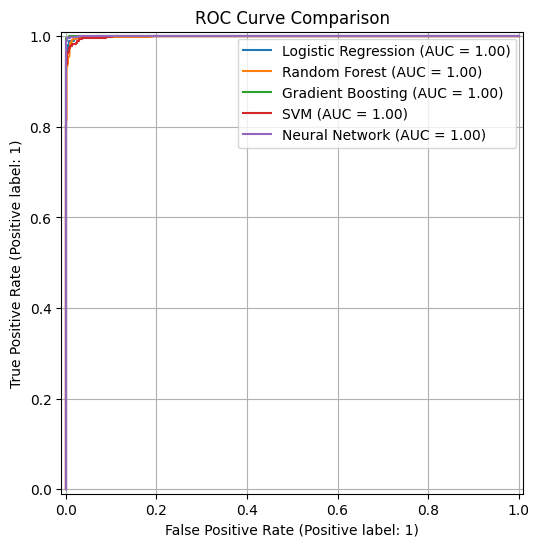

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model, name in [(log_reg_balanced, "Logistic Regression"),
                    (rf_balanced, "Random Forest"),
                    (gb_balanced, "Gradient Boosting"),
                    (svm_balanced, "SVM"),
                    (mlp_balanced, "Neural Network")]:
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, name=name, ax=plt.gca())

plt.title("ROC Curve Comparison")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# New input data
new_data = pd.DataFrame({
    'I': [5],       # Example values
    'Iu': [2],
    'Imax': [1],
    'E': [0.2],
    'Savg': [10],
    'R': [15],
    'F': [3]
})

# Standardize new data (using the same scaler as during training)
new_data_scaled = scaler.transform(new_data)

# Logistic Regression Prediction
log_reg_new_pred = log_reg_balanced.predict(new_data_scaled)
log_reg_new_proba = log_reg_balanced.predict_proba(new_data_scaled)
print("Logistic Regression New Data Predicted Class:", log_reg_new_pred)
print("Logistic Regression New Data Predicted Probabilities:", log_reg_new_proba)

# Repeat for other models:
# Random Forest
rf_new_pred = rf_balanced.predict(new_data_scaled)
rf_new_proba = rf_balanced.predict_proba(new_data_scaled)
print("Random Forest New Data Predicted Class:", rf_new_pred)
print("Random Forest New Data Predicted Probabilities:", rf_new_proba)

# Gradient Boosting
gb_new_pred = gb_balanced.predict(new_data_scaled)
gb_new_proba = gb_balanced.predict_proba(new_data_scaled)
print("Gradient Boosting New Data Predicted Class:", gb_new_pred)
print("Gradient Boosting New Data Predicted Probabilities:", gb_new_proba)

# SVM
svm_new_pred = svm_balanced.predict(new_data_scaled)
svm_new_proba = svm_balanced.predict_proba(new_data_scaled)
print("SVM New Data Predicted Class:", svm_new_pred)
print("SVM New Data Predicted Probabilities:", svm_new_proba)

# Neural Network
mlp_new_pred = mlp_balanced.predict(new_data_scaled)
mlp_new_proba = mlp_balanced.predict_proba(new_data_scaled)
print("Neural Network New Data Predicted Class:", mlp_new_pred)
print("Neural Network New Data Predicted Probabilities:", mlp_new_proba)


Logistic Regression New Data Predicted Class: [1]
Logistic Regression New Data Predicted Probabilities: [[0. 1.]]
Random Forest New Data Predicted Class: [1]
Random Forest New Data Predicted Probabilities: [[0.07 0.93]]
Gradient Boosting New Data Predicted Class: [1]
Gradient Boosting New Data Predicted Probabilities: [[2.36431006e-04 9.99763569e-01]]
SVM New Data Predicted Class: [1]
SVM New Data Predicted Probabilities: [[0.45542476 0.54457524]]
Neural Network New Data Predicted Class: [1]
Neural Network New Data Predicted Probabilities: [[0. 1.]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X doe

In [ ]:
# Simulated input data for Class 0 prediction
low_spender_data = pd.DataFrame({
    'I': [1],        # No purchases
    'Iu': [0],       # No unique products
    'Imax': [0],     # No bulk purchases
    'E': [0.1],      # No spending variability
    'Savg': [1],     # No average sale
    'R': [1000],     # Very high recency (last purchase was a long time ago)
    'F': [0]         # No frequency
})

# Standardize the new data
low_spender_scaled = scaler.transform(low_spender_data)

# Logistic Regression Prediction
log_reg_low_pred = log_reg_balanced.predict(low_spender_scaled)
log_reg_low_proba = log_reg_balanced.predict_proba(low_spender_scaled)
print("Logistic Regression Predicted Class (Low Spender):", log_reg_low_pred)
print("Logistic Regression Predicted Probabilities:", log_reg_low_proba)

# Repeat for Random Forest
rf_low_pred = rf_balanced.predict(low_spender_scaled)
rf_low_proba = rf_balanced.predict_proba(low_spender_scaled)
print("Random Forest Predicted Class (Low Spender):", rf_low_pred)
print("Random Forest Predicted Probabilities:", rf_low_proba)

# Repeat for Gradient Boosting
gb_low_pred = gb_balanced.predict(low_spender_scaled)
gb_low_proba = gb_balanced.predict_proba(low_spender_scaled)
print("Gradient Boosting Predicted Class (Low Spender):", gb_low_pred)
print("Gradient Boosting Predicted Probabilities:", gb_low_proba)

# Repeat for SVM
svm_low_pred = svm_balanced.predict(low_spender_scaled)
svm_low_proba = svm_balanced.predict_proba(low_spender_scaled)
print("SVM Predicted Class (Low Spender):", svm_low_pred)
print("SVM Predicted Probabilities:", svm_low_proba)

# Repeat for Neural Network
mlp_low_pred = mlp_balanced.predict(low_spender_scaled)
mlp_low_proba = mlp_balanced.predict_proba(low_spender_scaled)
print("Neural Network Predicted Class (Low Spender):", mlp_low_pred)
print("Neural Network Predicted Probabilities:", mlp_low_proba)


Logistic Regression Predicted Class (Low Spender): [0]
Logistic Regression Predicted Probabilities: [[1.00000000e+00 1.15854232e-19]]
Random Forest Predicted Class (Low Spender): [0]
Random Forest Predicted Probabilities: [[1. 0.]]
Gradient Boosting Predicted Class (Low Spender): [0]
Gradient Boosting Predicted Probabilities: [[9.99796493e-01 2.03507320e-04]]
SVM Predicted Class (Low Spender): [1]
SVM Predicted Probabilities: [[0.45556939 0.54443061]]
Neural Network Predicted Class (Low Spender): [0]
Neural Network Predicted Probabilities: [[1.00000000e+00 1.72913495e-57]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X doe

In [ ]:
# Simulated input data for Class 0 prediction
spender_data = pd.DataFrame({
    'I': [10],
    'Iu': [5],
    'Imax': [3],
    'E': [0.5],
    'Savg': [15],
    'R': [10],
    'F': [7]
})

# Standardize the new data
spender_scaled = scaler.transform(low_spender_data)

# Logistic Regression Prediction
log_reg_low_pred = log_reg_balanced.predict(spender_scaled)
log_reg_low_proba = log_reg_balanced.predict_proba(spender_scaled)
print("Logistic Regression Predicted Class (Low Spender):", log_reg_low_pred)
print("Logistic Regression Predicted Probabilities:", log_reg_low_proba)

# Repeat for Random Forest
rf_low_pred = rf_balanced.predict(spender_scaled)
rf_low_proba = rf_balanced.predict_proba(spender_scaled)
print("Random Forest Predicted Class (Low Spender):", rf_low_pred)
print("Random Forest Predicted Probabilities:", rf_low_proba)

# Repeat for Gradient Boosting
gb_low_pred = gb_balanced.predict(spender_scaled)
gb_low_proba = gb_balanced.predict_proba(spender_scaled)
print("Gradient Boosting Predicted Class (Low Spender):", gb_low_pred)
print("Gradient Boosting Predicted Probabilities:", gb_low_proba)

# Repeat for SVM
svm_low_pred = svm_balanced.predict(spender_scaled)
svm_low_proba = svm_balanced.predict_proba(spender_scaled)
print("SVM Predicted Class (Low Spender):", svm_low_pred)
print("SVM Predicted Probabilities:", svm_low_proba)

# Repeat for Neural Network
mlp_low_pred = mlp_balanced.predict(spender_scaled)
mlp_low_proba = mlp_balanced.predict_proba(spender_scaled)
print("Neural Network Predicted Class (Low Spender):", mlp_low_pred)
print("Neural Network Predicted Probabilities:", mlp_low_proba)


Logistic Regression Predicted Class (Low Spender): [1]
Logistic Regression Predicted Probabilities: [[0. 1.]]
Random Forest Predicted Class (Low Spender): [1]
Random Forest Predicted Probabilities: [[0.04 0.96]]
Gradient Boosting Predicted Class (Low Spender): [1]
Gradient Boosting Predicted Probabilities: [[2.41032586e-04 9.99758967e-01]]
SVM Predicted Class (Low Spender): [1]
SVM Predicted Probabilities: [[0.45542476 0.54457524]]
Neural Network Predicted Class (Low Spender): [1]
Neural Network Predicted Probabilities: [[0. 1.]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X doe

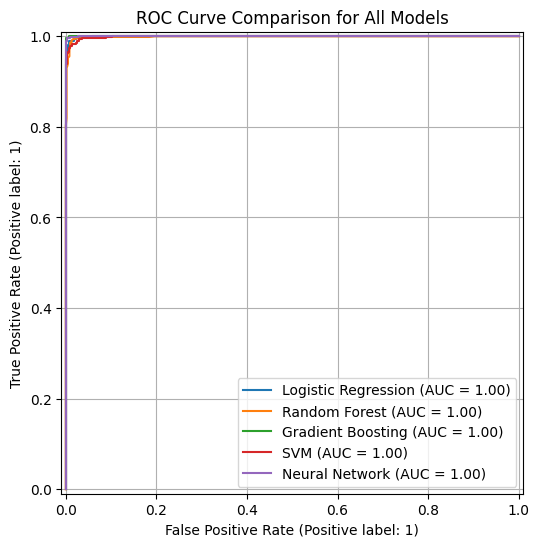

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot ROC Curve for all models
plt.figure(figsize=(10, 6))
for model, name in [(log_reg_balanced, "Logistic Regression"),
                    (rf_balanced, "Random Forest"),
                    (gb_balanced, "Gradient Boosting"),
                    (svm_balanced, "SVM"),
                    (mlp_balanced, "Neural Network")]:
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, name=name, ax=plt.gca())

plt.title("ROC Curve Comparison for All Models")
plt.grid()
plt.legend(loc="lower right")
plt.show()


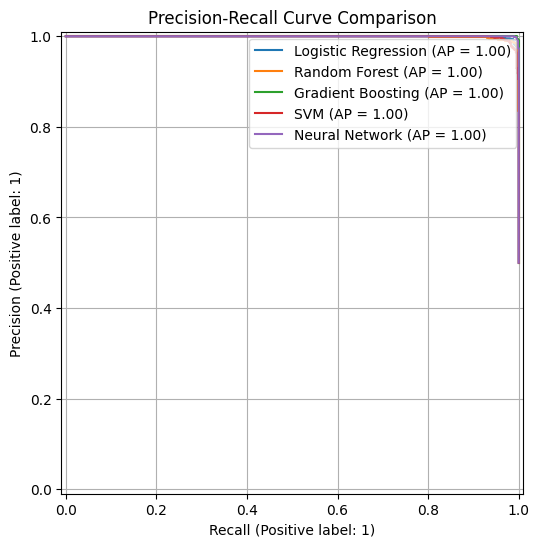

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

# Plot Precision-Recall Curve for all models
plt.figure(figsize=(10, 6))
for model, name in [(log_reg_balanced, "Logistic Regression"),
                    (rf_balanced, "Random Forest"),
                    (gb_balanced, "Gradient Boosting"),
                    (svm_balanced, "SVM"),
                    (mlp_balanced, "Neural Network")]:
    PrecisionRecallDisplay.from_estimator(model, X_test_scaled, y_test, name=name, ax=plt.gca())

plt.title("Precision-Recall Curve Comparison")
plt.grid()
plt.legend(loc="upper right")
plt.show()


<Figure size 600x600 with 0 Axes>

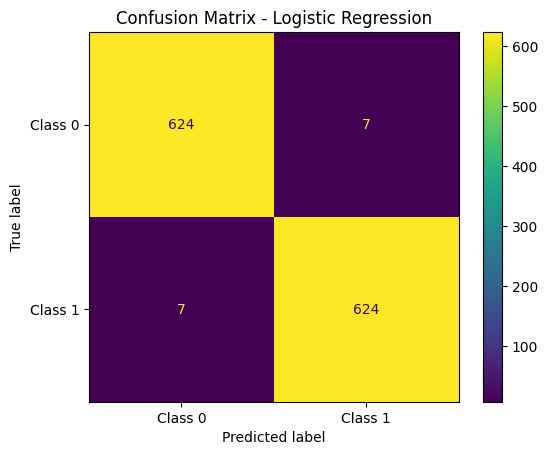

<Figure size 600x600 with 0 Axes>

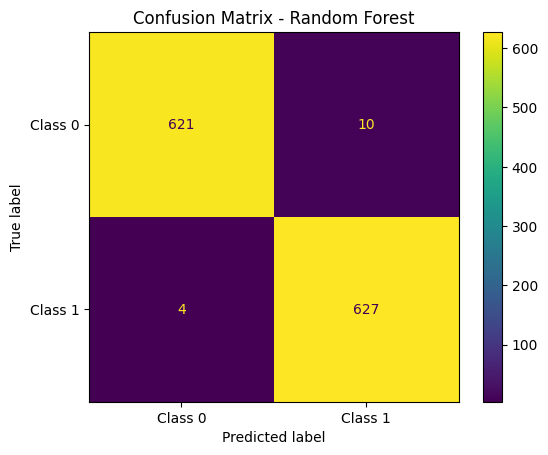

<Figure size 600x600 with 0 Axes>

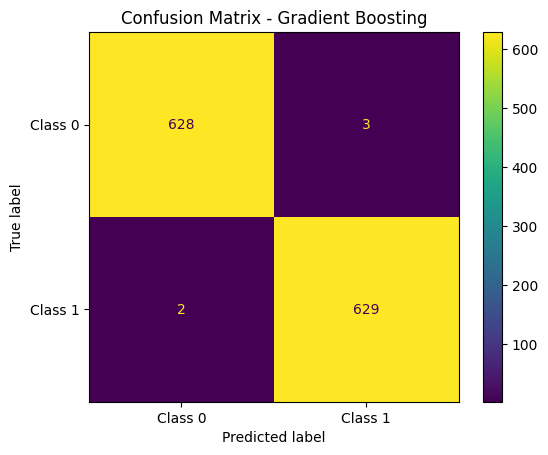

<Figure size 600x600 with 0 Axes>

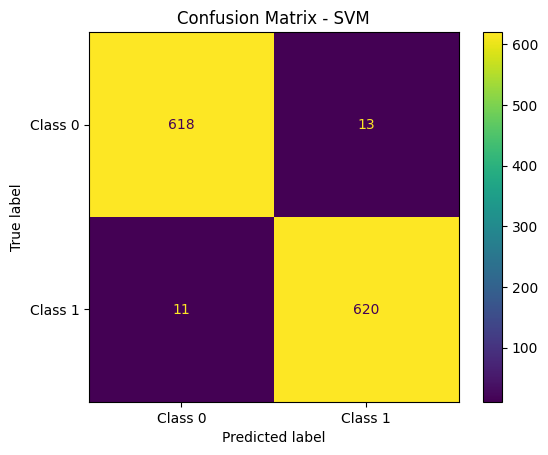

<Figure size 600x600 with 0 Axes>

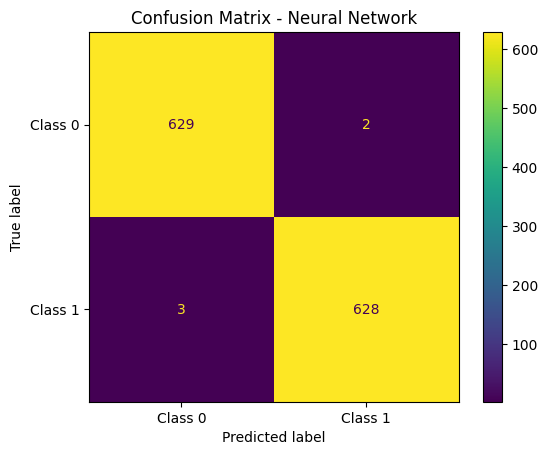

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix for each model
models = [
    (log_reg_balanced, "Logistic Regression"),
    (rf_balanced, "Random Forest"),
    (gb_balanced, "Gradient Boosting"),
    (svm_balanced, "SVM"),
    (mlp_balanced, "Neural Network")
]

for model, name in models:
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, display_labels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


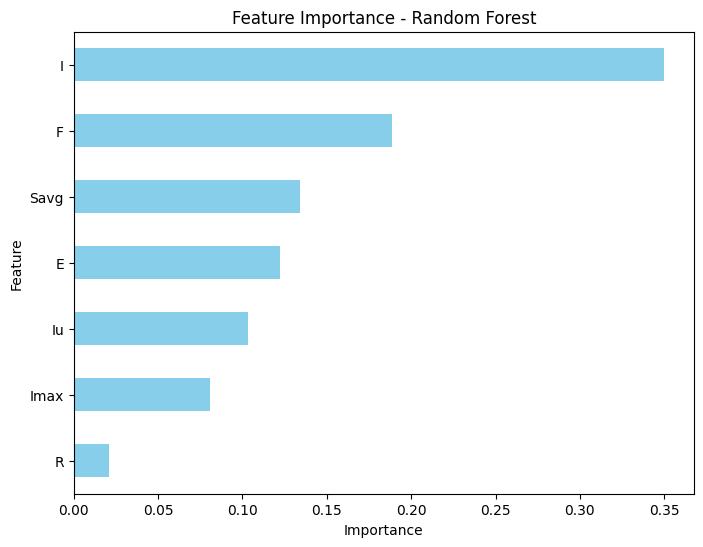

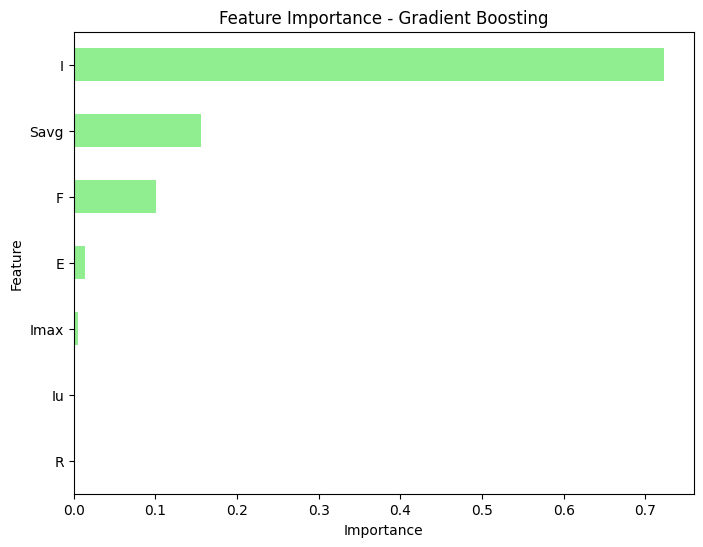

In [ ]:
import pandas as pd
import seaborn as sns

# Feature Importance for Random Forest
rf_importances = pd.Series(rf_balanced.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
rf_importances.sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Feature Importance for Gradient Boosting
gb_importances = pd.Series(gb_balanced.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
gb_importances.sort_values().plot(kind="barh", color="lightgreen")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


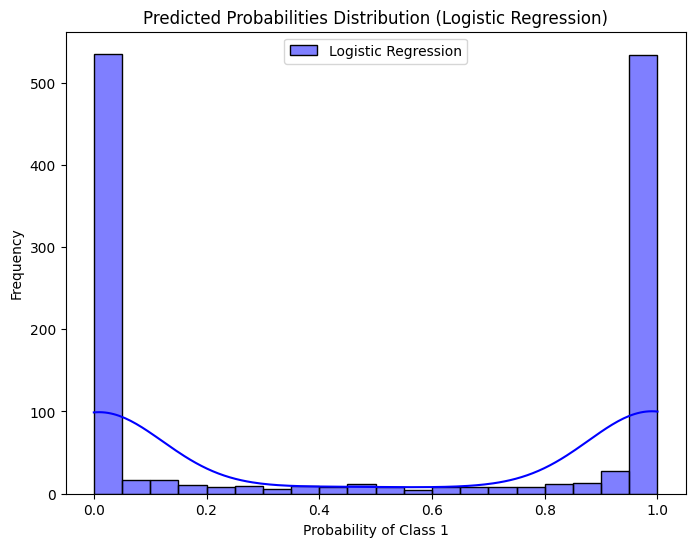

In [ ]:
# Predicted probabilities for Logistic Regression
log_proba = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]
plt.figure(figsize=(8, 6))
sns.histplot(log_proba, bins=20, kde=True, color="blue", label="Logistic Regression")
plt.title("Predicted Probabilities Distribution (Logistic Regression)")
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()


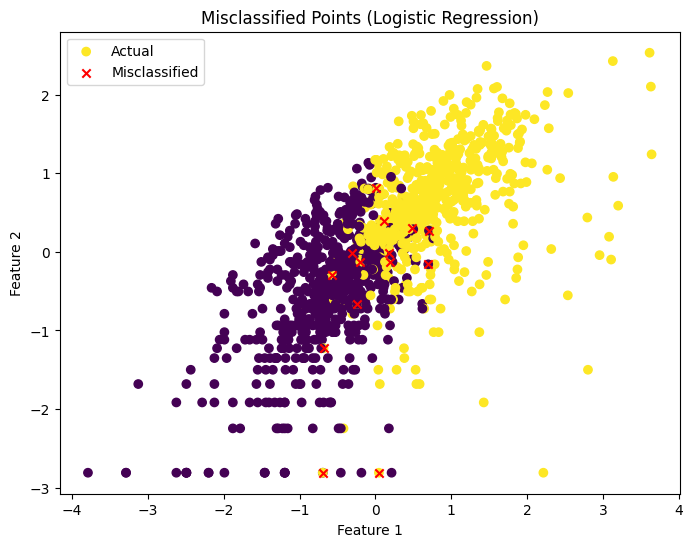

In [ ]:
import numpy as np

# Get misclassified points for Logistic Regression
y_pred_log = log_reg_balanced.predict(X_test_scaled)
misclassified = np.where(y_test != y_pred_log)[0]

# Visualize the misclassified points
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled.iloc[:, 0], X_test_scaled.iloc[:, 1], c=y_test, label="Actual")
plt.scatter(X_test_scaled.iloc[misclassified, 0], X_test_scaled.iloc[misclassified, 1], c="red", label="Misclassified", marker="x")
plt.title("Misclassified Points (Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


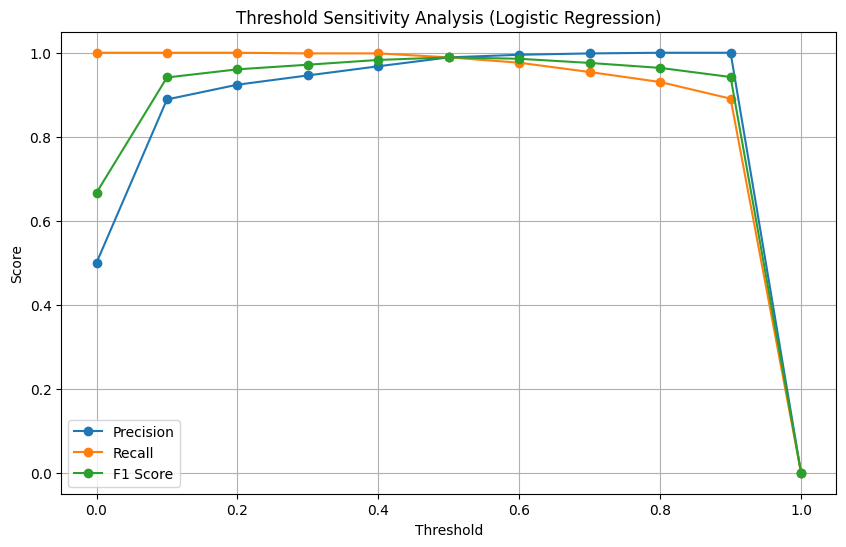

In [ ]:
thresholds = np.arange(0.0, 1.1, 0.1)
precision, recall, f1 = [], [], []

# Evaluate precision, recall, and F1 score at different thresholds
for threshold in thresholds:
    y_pred_threshold = (log_reg_balanced.predict_proba(X_test_scaled)[:, 1] > threshold).astype(int)
    precision.append(precision_score(y_test, y_pred_threshold))
    recall.append(recall_score(y_test, y_pred_threshold))
    f1.append(f1_score(y_test, y_pred_threshold))

# Plot the threshold sensitivity
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label="Precision", marker="o")
plt.plot(thresholds, recall, label="Recall", marker="o")
plt.plot(thresholds, f1, label="F1 Score", marker="o")
plt.title("Threshold Sensitivity Analysis (Logistic Regression)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to evaluate model performance with threshold adjustment
def evaluate_model_with_threshold(model, X_test, y_test, model_name, threshold=0.6):
    proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for Class 1
    y_pred = (proba > threshold).astype(int)   # Adjust predictions based on threshold

    # Collect performance metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, proba)
    }
    return metrics

# List of models to evaluate
models = [
    (log_reg_balanced, "Logistic Regression"),
    (rf_balanced, "Random Forest"),
    (gb_balanced, "Gradient Boosting"),
    (svm_balanced, "SVM"),
    (mlp_balanced, "Neural Network")
]

# Evaluate all models
comparison_metrics = [evaluate_model_with_threshold(model, X_test_scaled, y_test, name) for model, name in models]

# Convert to DataFrame for comparison
comparison_df = pd.DataFrame(comparison_metrics)

# Sort by ROC AUC for the best-performing model
comparison_df = comparison_df.sort_values(by="ROC AUC", ascending=False)

# Display the comparison table
print("Model Performance Comparison:")
print(comparison_df)

# Optional: Save the results to a file
comparison_df.to_csv("balanced_model_comparison.csv", index=False)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
2    Gradient Boosting  0.996830   0.996830  0.996830  0.996830  0.999975
4       Neural Network  0.995246   0.998405  0.992076  0.995231  0.999920
0  Logistic Regression  0.985737   0.995153  0.976228  0.985600  0.999558
3                  SVM  0.984152   0.988800  0.979398  0.984076  0.998993
1        Random Forest  0.987322   0.990431  0.984152  0.987281  0.998843
